# Library and Data preparation

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from factor_analyzer import FactorAnalyzer
import pingouin as pg
import psython as psy
from factor_analyzer import ConfirmatoryFactorAnalyzer, ModelSpecificationParser
from itertools import combinations
import math
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson



In [150]:
df = pd.read_csv("ZGP_survey_data.csv")  # read csv file
print(df.columns)

Index(['Which grade do you belong in?', 'Gender', 'Age', 'Nationality',
       'Which department do you belong in?',
       'I am satisfied with the quality of life as an university student',
       'I am satisfied with my overall performance at university class ',
       'I am getting the most out of my university education ',
       'I feel a sense of accomplishment from my campus activities',
       'I am proud of the effort I am putting on the university class ',
       'I would recommend the university to my friend or family member based on my experience on campus',
       'I am satisfied with my overall performance outside the campus ',
       'I feel that I am accomplishing something outside of school',
       'I can be proud of my extracurricular activity',
       'I am satisfied with my activeness outside the campus',
       'I am satisfied with the variety of out-of-campus opportunities',
       'I am satisfied with the progress I am making with job hunting',
       'I am sat

In [151]:
df.head(5)

,Which grade do you belong in?,Gender,Age,Nationality,Which department do you belong in?,I am satisfied with the quality of life as an university student,I am satisfied with my overall performance at university class,I am getting the most out of my university education,I feel a sense of accomplishment from my campus activities,I am proud of the effort I am putting on the university class,I would recommend the university to my friend or family member based on my experience on campus,I am satisfied with my overall performance outside the campus,I feel that I am accomplishing something outside of school,I can be proud of my extracurricular activity,I am satisfied with my activeness outside the campus,I am satisfied with the variety of out-of-campus opportunities,I am satisfied with the progress I am making with job hunting,I am satisfied with my current career plan,I am satisfied with the level of my dedication towards my future career,I feel confident that what I am experiencing will have a positive impact on my future career,I am confident that the network I am building will have a positive impact on my future career,I am satisfied with the way I interact with other students,I feel a sense of belonging with the community in the university,I think the interaction with other students is meaningful for my future,I would recommend the university to a friend or family member based on my social experience,I feel good and refreshed when I wake up in the morning,I don’t get sleepy in the middle of the day,What time do you often go to sleep?,How many hours do you sleep on average?,"How many days per week do you engage in moderate to vigorous physical activity, such as brisk walking, running, or playing sports?",How many servings of fruits and vegetables do you consume on an average day?,"How often do you consume foods that are high in saturated fat, added sugar, or salt?","On a scale of 1 to 5, how confident are you that you are following a healthy diet? (1 = not confident at all, 5 = very confident)",I am satisfied with the quality of life as an university student.1,Unnamed: 34
0,2nd,male,20,Japan,Economics PEARL,4,4,4,4,4,4,3,3,3,3,3,2,2,2,3,3,3,3,3,3,4,4,0:00~1:00,7~9 hours,7 days,Very often (daily),Sometimes (2-3 times a week),4,4,NaN
1,2nd,female,19,Outside Japan,Economics PEARL,4,3,4,4,3,3,4,5,5,5,4,3,3,3,4,5,3,4,4,4,4,5,0:00~1:00,4~7 hours,5-6 days,Often (4-5 times a week),Sometimes (2-3 times a week),4,4,NaN
2,2nd,male,20,Japan,Economics PEARL,4,1,1,3,1,3,5,5,5,5,3,2,2,3,2,2,5,5,5,3,4,4,23:00~0:00,7~9 hours,7 days,Rarely (once a week or less),Sometimes (2-3 times a week),3,4,NaN
3,2nd,female,20,Japan,Economics PEARL,4,4,2,2,3,2,4,4,4,4,2,2,5,3,3,1,4,2,4,2,4,2,0:00~1:00,7~9 hours,1-2 days,Very often (daily),Often (4-5 times a week),4,2,NaN
4,4th,female,22,Japan,Economics PEARL,4,4,2,3,2,1,4,5,4,4,2,5,4,3,3,5,4,2,5,3,1,1,0:00~1:00,4~7 hours,3-4 days,Often (4-5 times a week),Very often (daily),2,2,NaN


In [152]:
# there is a meaningless column at the end so drop it
df = df.drop(columns = ["Unnamed: 34"])


In [153]:
df.head(5)

,Which grade do you belong in?,Gender,Age,Nationality,Which department do you belong in?,I am satisfied with the quality of life as an university student,I am satisfied with my overall performance at university class,I am getting the most out of my university education,I feel a sense of accomplishment from my campus activities,I am proud of the effort I am putting on the university class,I would recommend the university to my friend or family member based on my experience on campus,I am satisfied with my overall performance outside the campus,I feel that I am accomplishing something outside of school,I can be proud of my extracurricular activity,I am satisfied with my activeness outside the campus,I am satisfied with the variety of out-of-campus opportunities,I am satisfied with the progress I am making with job hunting,I am satisfied with my current career plan,I am satisfied with the level of my dedication towards my future career,I feel confident that what I am experiencing will have a positive impact on my future career,I am confident that the network I am building will have a positive impact on my future career,I am satisfied with the way I interact with other students,I feel a sense of belonging with the community in the university,I think the interaction with other students is meaningful for my future,I would recommend the university to a friend or family member based on my social experience,I feel good and refreshed when I wake up in the morning,I don’t get sleepy in the middle of the day,What time do you often go to sleep?,How many hours do you sleep on average?,"How many days per week do you engage in moderate to vigorous physical activity, such as brisk walking, running, or playing sports?",How many servings of fruits and vegetables do you consume on an average day?,"How often do you consume foods that are high in saturated fat, added sugar, or salt?","On a scale of 1 to 5, how confident are you that you are following a healthy diet? (1 = not confident at all, 5 = very confident)",I am satisfied with the quality of life as an university student.1
0,2nd,male,20,Japan,Economics PEARL,4,4,4,4,4,4,3,3,3,3,3,2,2,2,3,3,3,3,3,3,4,4,0:00~1:00,7~9 hours,7 days,Very often (daily),Sometimes (2-3 times a week),4,4
1,2nd,female,19,Outside Japan,Economics PEARL,4,3,4,4,3,3,4,5,5,5,4,3,3,3,4,5,3,4,4,4,4,5,0:00~1:00,4~7 hours,5-6 days,Often (4-5 times a week),Sometimes (2-3 times a week),4,4
2,2nd,male,20,Japan,Economics PEARL,4,1,1,3,1,3,5,5,5,5,3,2,2,3,2,2,5,5,5,3,4,4,23:00~0:00,7~9 hours,7 days,Rarely (once a week or less),Sometimes (2-3 times a week),3,4
3,2nd,female,20,Japan,Economics PEARL,4,4,2,2,3,2,4,4,4,4,2,2,5,3,3,1,4,2,4,2,4,2,0:00~1:00,7~9 hours,1-2 days,Very often (daily),Often (4-5 times a week),4,2
4,4th,female,22,Japan,Economics PEARL,4,4,2,3,2,1,4,5,4,4,2,5,4,3,3,5,4,2,5,3,1,1,0:00~1:00,4~7 hours,3-4 days,Often (4-5 times a week),Very often (daily),2,2


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 34 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                              --------------  ----- 
 0   Which grade do you belong in?                                                                                                       52 non-null     object
 1   Gender                                                                                                                              52 non-null     object
 2   Age                                                                                                                                 52 non-null     int64 
 3   Nationality                                                                                 

In [155]:
# rename the columns to shorter name

df = df.rename(columns = {'Which grade do you belong in?': "Grade", 
       'Which department do you belong in?': "Department",
       'I am satisfied with the quality of life as an university student': "SQ_QOL",
       'I am satisfied with my overall performance at university class ': "SQ_IC_Perform",
       'I am getting the most out of my university education ': "SQ_IC_Effort",
       'I feel a sense of accomplishment from my campus activities': "SQ_IC_Accomp",
       'I am proud of the effort I am putting on the university class ': "SQ_IC_Pride",
       'I would recommend the university to my friend or family member based on my experience on campus': "SQ_IC_Recom",
       'I am satisfied with my overall performance outside the campus ': "SQ_OC_Perform",
       'I feel that I am accomplishing something outside of school': "SQ_OC_Accomp",
       'I can be proud of my extracurricular activity': "SQ_OC_Pride",
       'I am satisfied with my activeness outside the campus': "SQ_OC_Active",
       'I am satisfied with the variety of out-of-campus opportunities': "SQ_OC_VarOp",
       'I am satisfied with the progress I am making with job hunting': "SQ_JH_Prog",
       'I am satisfied with my current career plan ': "SQ_JH_Plan",
       'I am satisfied with the level of my dedication towards my future career': "SQ_JH_Dedi",
       'I feel confident that what I am experiencing will have a positive impact on my future career': "SQ_JH_Exp",
       'I am confident that the network I am building will have a positive impact on my future career': "SQ_JH_Netw",
       'I am satisfied with the way I interact with other students': "SQ_SI_Way",
       'I feel a sense of belonging with the community in the university': "SQ_SI_Belong",
       'I think the interaction with other students is meaningful for my future': "SQ_SI_Future",
       'I would recommend the university to a friend or family member based on my social experience ': "SQ_SI_Recom",
       'I feel good and refreshed when I wake up in the morning': "SQ_SL_Morn",
       'I don’t get sleepy in the middle of the day': "SQ_SL_Mid",
       'What time do you often go to sleep?': "SQ_SL_When",
       'How many hours do you sleep on average?': "SQ_SL_Hour",
       'How many days per week do you engage in moderate to vigorous physical activity, such as brisk walking, running, or playing sports?': "SQ_EXER",
       'How many servings of fruits and vegetables do you consume on an average day?': "SQ_D_Healthy",
       'How often do you consume foods that are high in saturated fat, added sugar, or salt?': "SQ_D_Unhealthy",
       'On a scale of 1 to 5, how confident are you that you are following a healthy diet? (1 = not confident at all, 5 = very confident)': "SQ_D_Conf",
       'I am satisfied with the quality of life as an university student.1': "SQ_QOL_Re"
                     })

1. 'I am satisfied with the quality of life as an university student': "SQ_QOL"

2. 'I am satisfied with my overall performance at university class ': "SQ_IC_Perform"

3. 'I am getting the most out of my university education ': "SQ_IC_Effort"

4. 'I feel a sense of accomplishment from my campus activities': "SQ_IC_Accomp"

5. 'I am proud of the effort I am putting on the university class ': "SQ_IC_Pride"

6. 'I would recommend the university to my friend or family member based on my experience on campus': "SQ_IC_Recom"

7. 'I am satisfied with my overall performance outside the campus ': "SQ_OC_Perform"

8. 'I feel that I am accomplishing something outside of school': "SQ_OC_Accomp"

9. 'I can be proud of my extracurricular activity': "SQ_OC_Pride"

10. 'I am satisfied with my activeness outside the campus': "SQ_OC_Active"

11. 'I am satisfied with the variety of out-of-campus opportunities': "SQ_OC_VarOp"

12. 'I am satisfied with the progress I am making with job hunting': "SQ_JH_Prog"

13. 'I am satisfied with my current career plan ': "SQ_JH_Plan"

14. 'I am satisfied with the level of my dedication towards my future career': "SQ_JH_Dedi"

15. 'I feel confident that what I am experiencing will have a positive impact on my future career': "SQ_JH_Exp"

16. 'I am confident that the network I am building will have a positive impact on my future career': "SQ_JH_Netw"

17. 'I am satisfied with the way I interact with other students': "SQ_SI_Way"

18. 'I feel a sense of belonging with the community in the university': "SQ_SI_Belong"

19. 'I think the interaction with other students is meaningful for my future': "SQ_SI_Future"
       
20. 'I would recommend the university to a friend or family member based on my social experience ': "SQ_SI_Recom"

21. 'I feel good and refreshed when I wake up in the morning': "SQ_SL_Morn"

22. 'I don’t get sleepy in the middle of the day': "SQ_SL_Mid"

23. 'What time do you often go to sleep?': "SQ_SL_When"

24. 'How many hours do you sleep on average?': "SQ_SL_Hour"

25. 'How many days per week do you engage in moderate to vigorous physical activity, such as brisk walking, running, or playing sports?': "SQ_EXER"

26. 'How many servings of fruits and vegetables do you consume on an average day?': "SQ_D_Healthy"

27. 'How often do you consume foods that are high in saturated fat, added sugar, or salt?': "SQ_D_Unhealthy"

28. 'On a scale of 1 to 5, how confident are you that you are following a healthy diet? (1 = not confident at all, 5 = very confident)': "SQ_D_Conf"

29. 'I am satisfied with the quality of life as an university student (revisited)': "SQ_QOL_Re"

In [156]:
df.head(5)

,Grade,Gender,Age,Nationality,Department,SQ_QOL,SQ_IC_Perform,SQ_IC_Effort,SQ_IC_Accomp,SQ_IC_Pride,SQ_IC_Recom,SQ_OC_Perform,SQ_OC_Accomp,SQ_OC_Pride,SQ_OC_Active,SQ_OC_VarOp,SQ_JH_Prog,SQ_JH_Plan,SQ_JH_Dedi,SQ_JH_Exp,SQ_JH_Netw,SQ_SI_Way,SQ_SI_Belong,SQ_SI_Future,SQ_SI_Recom,SQ_SL_Morn,SQ_SL_Mid,SQ_SL_When,SQ_SL_Hour,SQ_EXER,SQ_D_Healthy,SQ_D_Unhealthy,SQ_D_Conf,SQ_QOL_Re
0,2nd,male,20,Japan,Economics PEARL,4,4,4,4,4,4,3,3,3,3,3,2,2,2,3,3,3,3,3,3,4,4,0:00~1:00,7~9 hours,7 days,Very often (daily),Sometimes (2-3 times a week),4,4
1,2nd,female,19,Outside Japan,Economics PEARL,4,3,4,4,3,3,4,5,5,5,4,3,3,3,4,5,3,4,4,4,4,5,0:00~1:00,4~7 hours,5-6 days,Often (4-5 times a week),Sometimes (2-3 times a week),4,4
2,2nd,male,20,Japan,Economics PEARL,4,1,1,3,1,3,5,5,5,5,3,2,2,3,2,2,5,5,5,3,4,4,23:00~0:00,7~9 hours,7 days,Rarely (once a week or less),Sometimes (2-3 times a week),3,4
3,2nd,female,20,Japan,Economics PEARL,4,4,2,2,3,2,4,4,4,4,2,2,5,3,3,1,4,2,4,2,4,2,0:00~1:00,7~9 hours,1-2 days,Very often (daily),Often (4-5 times a week),4,2
4,4th,female,22,Japan,Economics PEARL,4,4,2,3,2,1,4,5,4,4,2,5,4,3,3,5,4,2,5,3,1,1,0:00~1:00,4~7 hours,3-4 days,Often (4-5 times a week),Very often (daily),2,2


In [157]:
# create another dataframe where all values are integers 
# range of value is 1~. Theoretically, higher the better for students
# convert all answers to quantitative scale
# for correlation matrix, regression, etc

df_quant = df.replace({"SQ_SL_When":{"Before 22:00": 6, "22:00~23:00": 5, "23:00~0:00": 4, "0:00~1:00": 3, "1:00~2:00": 2, "After 2:00": 1}, 
                      "SQ_SL_Hour":{"more than 9 hours": 2, "7~9 hours": 3, "4~7 hours": 2, "less than 4 hours": 1},
                      "SQ_EXER":{"7 days": 5, "5-6 days": 4, "3-4 days": 3, "1-2 days": 2, "0 days": 1},
                      "SQ_D_Healthy":{"Very often (daily)": 5, "Often (4-5 times a week)": 4, "Sometimes (2-3 times a week)": 3, "Rarely (once a week or less)": 2, "Never": 1},
                      "SQ_D_Unhealthy":{"Very often (daily)": 1, "Often (4-5 times a week)": 2, "Sometimes (2-3 times a week)": 3, "Rarely (once a week or less)": 4, "Never": 5}})
df_quant.head(5)


,Grade,Gender,Age,Nationality,Department,SQ_QOL,SQ_IC_Perform,SQ_IC_Effort,SQ_IC_Accomp,SQ_IC_Pride,SQ_IC_Recom,SQ_OC_Perform,SQ_OC_Accomp,SQ_OC_Pride,SQ_OC_Active,SQ_OC_VarOp,SQ_JH_Prog,SQ_JH_Plan,SQ_JH_Dedi,SQ_JH_Exp,SQ_JH_Netw,SQ_SI_Way,SQ_SI_Belong,SQ_SI_Future,SQ_SI_Recom,SQ_SL_Morn,SQ_SL_Mid,SQ_SL_When,SQ_SL_Hour,SQ_EXER,SQ_D_Healthy,SQ_D_Unhealthy,SQ_D_Conf,SQ_QOL_Re
0,2nd,male,20,Japan,Economics PEARL,4,4,4,4,4,4,3,3,3,3,3,2,2,2,3,3,3,3,3,3,4,4,3,3,5,5,3,4,4
1,2nd,female,19,Outside Japan,Economics PEARL,4,3,4,4,3,3,4,5,5,5,4,3,3,3,4,5,3,4,4,4,4,5,3,2,4,4,3,4,4
2,2nd,male,20,Japan,Economics PEARL,4,1,1,3,1,3,5,5,5,5,3,2,2,3,2,2,5,5,5,3,4,4,4,3,5,2,3,3,4
3,2nd,female,20,Japan,Economics PEARL,4,4,2,2,3,2,4,4,4,4,2,2,5,3,3,1,4,2,4,2,4,2,3,3,2,5,2,4,2
4,4th,female,22,Japan,Economics PEARL,4,4,2,3,2,1,4,5,4,4,2,5,4,3,3,5,4,2,5,3,1,1,3,2,3,4,1,2,2


In [158]:
# create dataframe that include just SQ, not student information (grade, gender, age, nationality, dapartment)
df_SQ = df.drop(columns = ["Grade", "Gender", "Age", "Nationality", "Department"])
df_quant_SQ = df_quant.drop(columns = ["Grade", "Gender", "Age", "Nationality", "Department"])



In [159]:
df_SQ.head(5)

,SQ_QOL,SQ_IC_Perform,SQ_IC_Effort,SQ_IC_Accomp,SQ_IC_Pride,SQ_IC_Recom,SQ_OC_Perform,SQ_OC_Accomp,SQ_OC_Pride,SQ_OC_Active,SQ_OC_VarOp,SQ_JH_Prog,SQ_JH_Plan,SQ_JH_Dedi,SQ_JH_Exp,SQ_JH_Netw,SQ_SI_Way,SQ_SI_Belong,SQ_SI_Future,SQ_SI_Recom,SQ_SL_Morn,SQ_SL_Mid,SQ_SL_When,SQ_SL_Hour,SQ_EXER,SQ_D_Healthy,SQ_D_Unhealthy,SQ_D_Conf,SQ_QOL_Re
0,4,4,4,4,4,4,3,3,3,3,3,2,2,2,3,3,3,3,3,3,4,4,0:00~1:00,7~9 hours,7 days,Very often (daily),Sometimes (2-3 times a week),4,4
1,4,3,4,4,3,3,4,5,5,5,4,3,3,3,4,5,3,4,4,4,4,5,0:00~1:00,4~7 hours,5-6 days,Often (4-5 times a week),Sometimes (2-3 times a week),4,4
2,4,1,1,3,1,3,5,5,5,5,3,2,2,3,2,2,5,5,5,3,4,4,23:00~0:00,7~9 hours,7 days,Rarely (once a week or less),Sometimes (2-3 times a week),3,4
3,4,4,2,2,3,2,4,4,4,4,2,2,5,3,3,1,4,2,4,2,4,2,0:00~1:00,7~9 hours,1-2 days,Very often (daily),Often (4-5 times a week),4,2
4,4,4,2,3,2,1,4,5,4,4,2,5,4,3,3,5,4,2,5,3,1,1,0:00~1:00,4~7 hours,3-4 days,Often (4-5 times a week),Very often (daily),2,2


In [160]:
df_quant_SQ["SQ_EXER"]

0     5
1     4
2     5
3     2
4     3
5     4
6     2
7     2
8     2
9     3
10    2
11    3
12    3
13    3
14    2
15    3
16    2
17    2
18    2
19    3
20    4
21    4
22    2
23    5
24    3
25    3
26    5
27    3
28    3
29    3
30    2
31    5
32    1
33    2
34    2
35    5
36    4
37    5
38    4
39    4
40    4
41    2
42    3
43    2
44    2
45    2
46    5
47    3
48    2
49    2
50    5
51    2
Name: SQ_EXER, dtype: int64

In [161]:
df_quant_SQ.head(5)

,SQ_QOL,SQ_IC_Perform,SQ_IC_Effort,SQ_IC_Accomp,SQ_IC_Pride,SQ_IC_Recom,SQ_OC_Perform,SQ_OC_Accomp,SQ_OC_Pride,SQ_OC_Active,SQ_OC_VarOp,SQ_JH_Prog,SQ_JH_Plan,SQ_JH_Dedi,SQ_JH_Exp,SQ_JH_Netw,SQ_SI_Way,SQ_SI_Belong,SQ_SI_Future,SQ_SI_Recom,SQ_SL_Morn,SQ_SL_Mid,SQ_SL_When,SQ_SL_Hour,SQ_EXER,SQ_D_Healthy,SQ_D_Unhealthy,SQ_D_Conf,SQ_QOL_Re
0,4,4,4,4,4,4,3,3,3,3,3,2,2,2,3,3,3,3,3,3,4,4,3,3,5,5,3,4,4
1,4,3,4,4,3,3,4,5,5,5,4,3,3,3,4,5,3,4,4,4,4,5,3,2,4,4,3,4,4
2,4,1,1,3,1,3,5,5,5,5,3,2,2,3,2,2,5,5,5,3,4,4,4,3,5,2,3,3,4
3,4,4,2,2,3,2,4,4,4,4,2,2,5,3,3,1,4,2,4,2,4,2,3,3,2,5,2,4,2
4,4,4,2,3,2,1,4,5,4,4,2,5,4,3,3,5,4,2,5,3,1,1,3,2,3,4,1,2,2


In [162]:
scaler = StandardScaler().fit(df_quant_SQ)
df_quant_SQ_STD = pd.DataFrame(scaler.fit_transform(df_quant_SQ), columns = df_quant_SQ.columns, index = df_quant_SQ.index)


In [163]:
df_quant_SQ_STD

,SQ_QOL,SQ_IC_Perform,SQ_IC_Effort,SQ_IC_Accomp,SQ_IC_Pride,SQ_IC_Recom,SQ_OC_Perform,SQ_OC_Accomp,SQ_OC_Pride,SQ_OC_Active,SQ_OC_VarOp,SQ_JH_Prog,SQ_JH_Plan,SQ_JH_Dedi,SQ_JH_Exp,SQ_JH_Netw,SQ_SI_Way,SQ_SI_Belong,SQ_SI_Future,SQ_SI_Recom,SQ_SL_Morn,SQ_SL_Mid,SQ_SL_When,SQ_SL_Hour,SQ_EXER,SQ_D_Healthy,SQ_D_Unhealthy,SQ_D_Conf,SQ_QOL_Re
0,0.533465,0.592667,1.194924,0.900180,0.86724,0.638470,-0.926285,-0.818994,-0.84,-0.625650,-0.063571,-0.544962,-1.022415,-1.112811,-1.138299,-1.023182,-1.185168,-0.745043,-1.420912,-0.712627,1.167748,1.521013,-0.041849,1.080123,1.68550,0.955619,0.420426,0.852266,0.457496
1,0.533465,-0.508001,1.194924,0.900180,-0.03469,-0.399043,0.193874,1.073793,1.24,1.407711,1.038331,0.340601,-0.073030,-0.132028,0.238249,1.105036,-1.185168,0.097180,-0.209643,0.316723,1.167748,2.451515,-0.041849,-0.925820,0.80904,-0.173749,0.420426,0.852266,0.457496
2,0.533465,-2.709336,-2.019010,-0.140028,-1.83855,-0.399043,1.314033,1.073793,1.24,1.407711,-0.063571,-0.544962,-1.022415,-0.132028,-2.514847,-2.087291,1.097378,0.939402,1.001626,-0.712627,1.167748,1.521013,1.046217,1.080123,1.68550,-2.432485,0.420426,-0.313993,0.457496
3,0.533465,0.592667,-0.947698,-1.180236,-0.03469,-1.436556,0.193874,0.127399,0.20,0.391031,-1.165474,-0.544962,1.825742,-0.132028,-1.138299,-3.151400,-0.043895,-1.587266,-0.209643,-1.741977,1.167748,-0.339991,-0.041849,1.080123,-0.94388,0.955619,-0.865584,0.852266,-1.808197
4,0.533465,0.592667,-0.947698,-0.140028,-0.93662,-2.474069,0.193874,1.073793,0.20,0.391031,-1.165474,2.111728,0.876356,-0.132028,-1.138299,1.105036,-0.043895,-1.587266,1.001626,-0.712627,-1.868397,-1.270493,-0.041849,-0.925820,-0.06742,-0.173749,-2.151594,-1.480252,-1.808197
5,-0.622376,-2.709336,0.123613,-2.220444,-1.83855,-1.436556,1.314033,1.073793,1.24,1.407711,2.140234,0.340601,-0.073030,1.829537,1.614797,0.040927,1.097378,0.939402,1.001626,1.346073,2.179797,-0.339991,1.046217,-0.925820,0.80904,-0.173749,0.420426,0.852266,1.590342
6,-0.622376,-0.508001,-0.947698,-1.180236,-0.93662,-1.436556,0.193874,0.127399,0.20,0.391031,1.038331,0.340601,-0.073030,-0.132028,0.238249,0.040927,-1.185168,0.097180,-1.420912,-1.741977,-0.856349,-0.339991,-1.129915,1.080123,-0.94388,0.955619,0.420426,0.852266,-0.675351
7,0.533465,-0.508001,0.123613,0.900180,0.86724,0.638470,1.314033,1.073793,0.20,0.391031,-0.063571,-1.430526,0.876356,-0.132028,0.238249,0.040927,1.097378,0.939402,1.001626,1.346073,-1.868397,-1.270493,-1.129915,-0.925820,-0.94388,-0.173749,0.420426,-1.480252,0.457496
8,1.689306,0.592667,1.194924,1.940388,-0.03469,1.675982,1.314033,1.073793,1.24,0.391031,-0.063571,2.111728,1.825742,0.848755,0.238249,0.040927,-0.043895,0.939402,1.001626,1.346073,0.155700,-0.339991,-0.041849,-0.925820,-0.94388,0.955619,0.420426,-0.313993,1.590342
9,0.533465,1.693335,1.194924,-1.180236,0.86724,0.638470,0.193874,-1.765388,-0.84,0.391031,1.038331,-0.544962,-1.971801,-0.132028,0.238249,-1.023182,-0.043895,0.939402,1.001626,1.346073,1.167748,-0.339991,1.046217,1.080123,-0.06742,-0.173749,0.420426,-0.313993,1.590342


In [164]:
###Dataframes ready for analysis###

### df 
# dataframe where some columns have qualitative values (SQ_SL_When, SQ_SL_Hour, SQ_EXCER, SQ_D_Healthy, SQ_D_Unhealthy)
# contains student information in column

### df_quant
# dataframe where all columns but student information are integers
# contains student information

### df_SQ
# same as df, but student information columns are dropped

### df_quant_SQ
# same as df_quant, but student information columns are dropped
# dataframe that all values are integers
# use it for correlation matrix and other

### df_quant_SQ_STD
# same as df_quant_SQ, but all values are satndardized
# all values have same scale now (mean=0, variance=1)
# good for PCA and other analysis

# Correlation Matrix

<Axes: title={'center': 'Correlation Matrix'}>

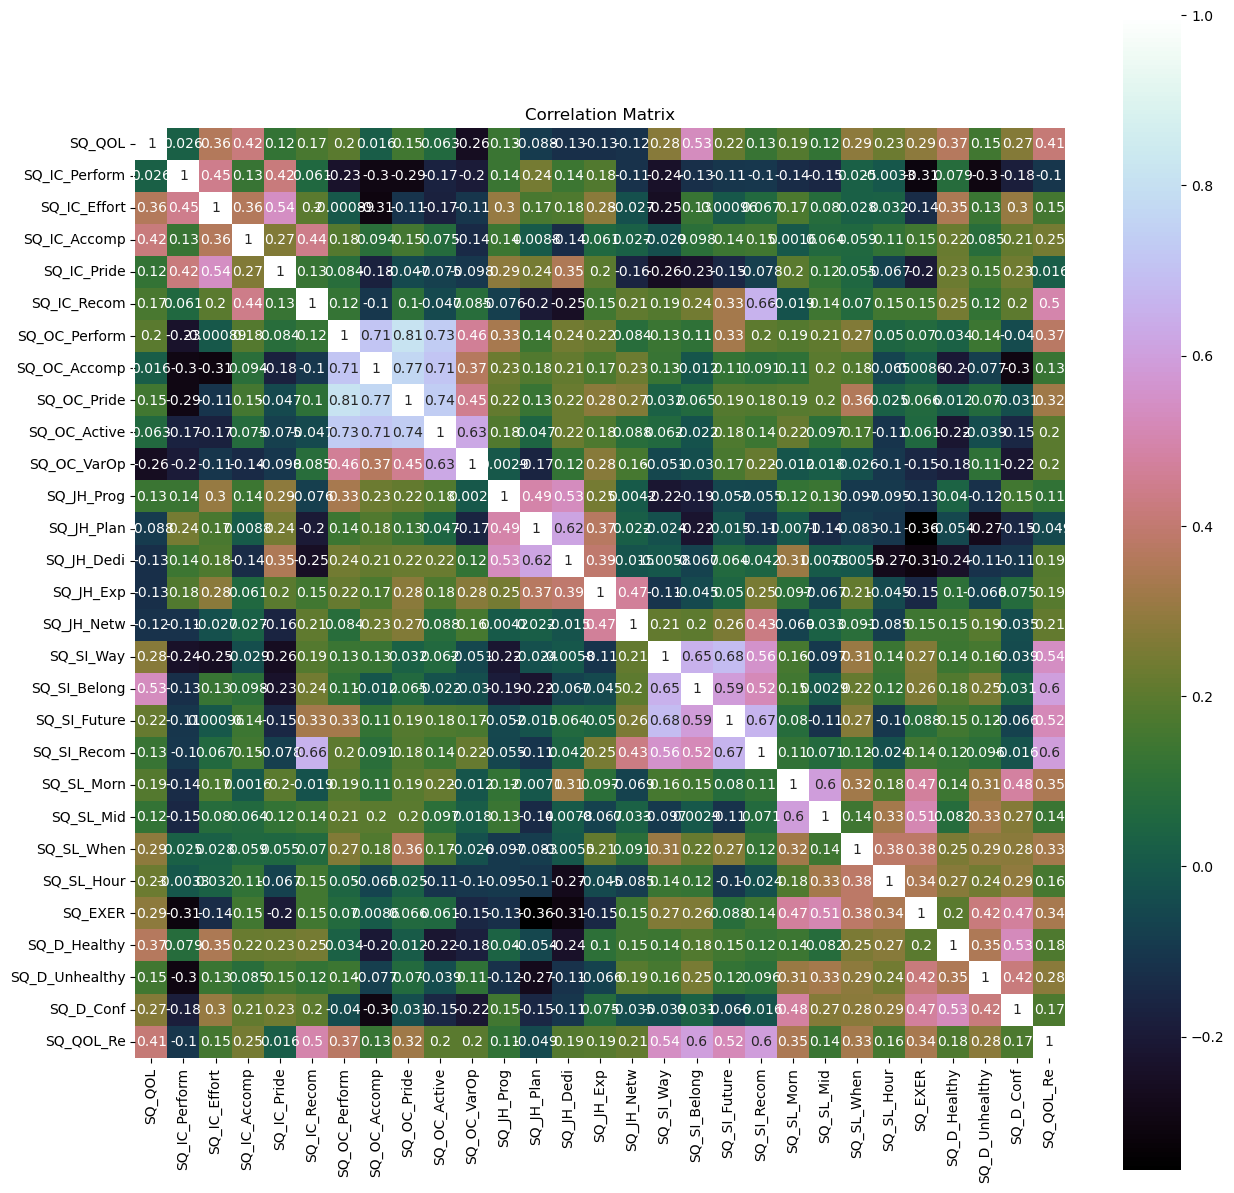

In [ ]:
# correlation matrix

correlation = df_quant_SQ.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

# Descriptive Stats

In [166]:
# Descriptive statistics
pd.set_option("display.max_columns", 50)
df_quant_SQ.describe().round(2).head(8)

,SQ_QOL,SQ_IC_Perform,SQ_IC_Effort,SQ_IC_Accomp,SQ_IC_Pride,SQ_IC_Recom,SQ_OC_Perform,SQ_OC_Accomp,SQ_OC_Pride,SQ_OC_Active,SQ_OC_VarOp,SQ_JH_Prog,SQ_JH_Plan,SQ_JH_Dedi,SQ_JH_Exp,SQ_JH_Netw,SQ_SI_Way,SQ_SI_Belong,SQ_SI_Future,SQ_SI_Recom,SQ_SL_Morn,SQ_SL_Mid,SQ_SL_When,SQ_SL_Hour,SQ_EXER,SQ_D_Healthy,SQ_D_Unhealthy,SQ_D_Conf,SQ_QOL_Re
count,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00
mean,3.54,3.46,2.88,3.13,3.04,3.38,3.83,3.87,3.81,3.62,3.06,2.62,3.08,3.13,3.83,3.96,4.04,3.88,4.17,3.69,2.85,2.37,3.04,2.46,3.08,4.15,2.67,3.27,3.60
std,0.87,0.92,0.94,0.97,1.12,0.97,0.90,1.07,0.97,0.99,0.92,1.14,1.06,1.03,0.73,0.95,0.88,1.20,0.83,0.98,1.00,1.09,0.93,0.50,1.15,0.89,0.79,0.87,0.89
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00
25%,3.00,3.00,2.00,2.75,2.00,3.00,3.00,3.00,3.00,3.00,2.75,2.00,2.00,2.00,3.00,3.75,3.75,3.00,4.00,3.00,2.00,2.00,3.00,2.00,2.00,4.00,2.00,3.00,3.00
50%,4.00,4.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,2.00,3.00,2.00,3.00,4.00,3.00,3.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,5.00,5.00,5.00,4.00,4.00,3.00,3.00,3.00,4.00,5.00,3.00,4.00,4.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,6.00,3.00,5.00,5.00,4.00,5.00,5.00


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_5525/2436610950.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


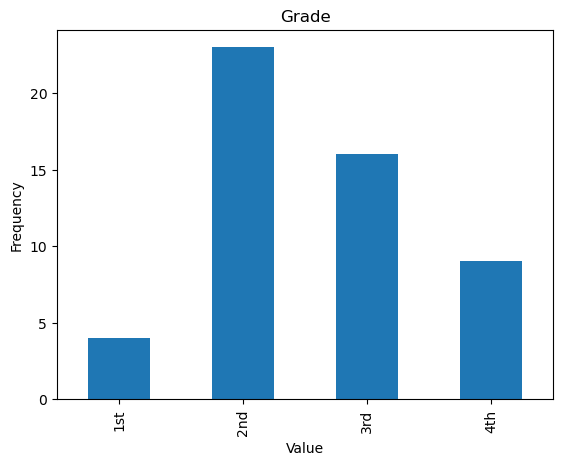

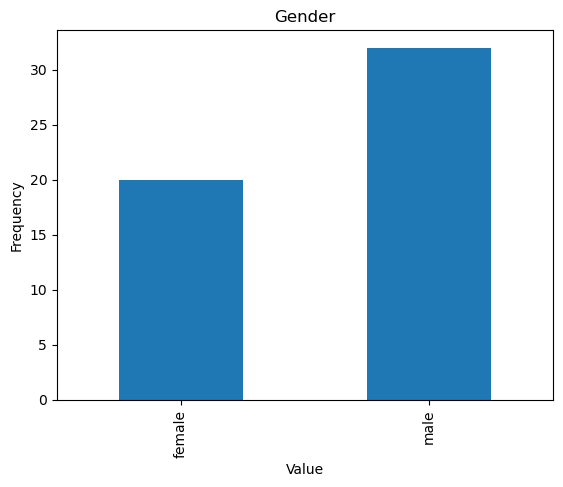

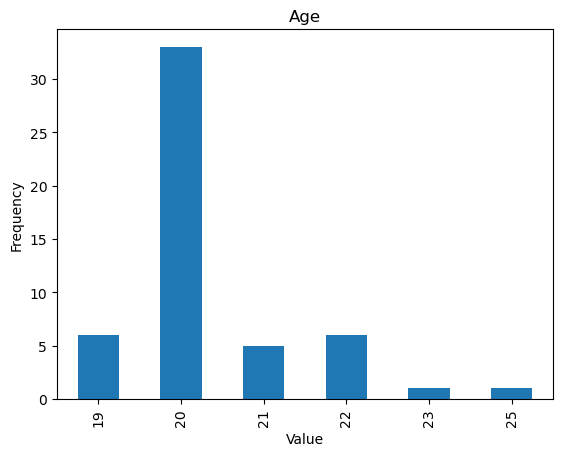

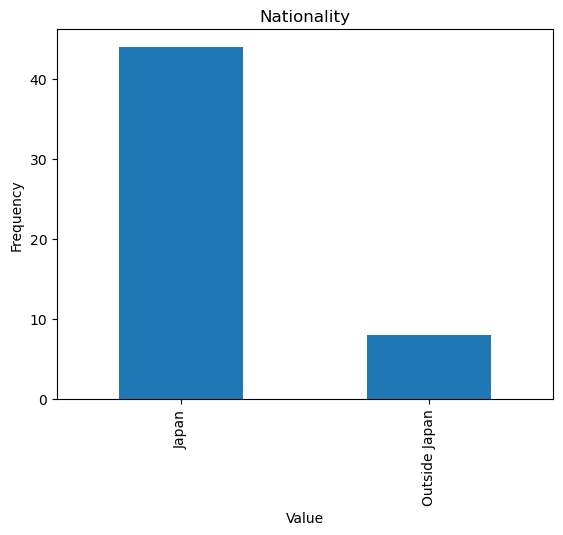

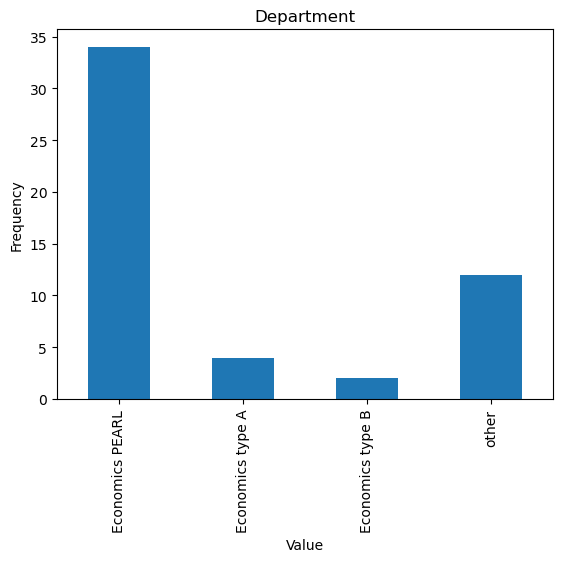

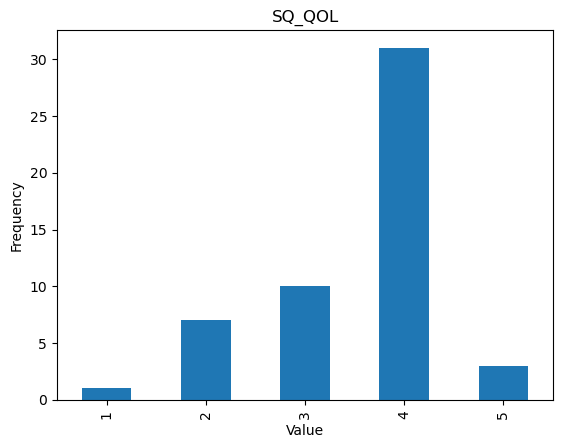

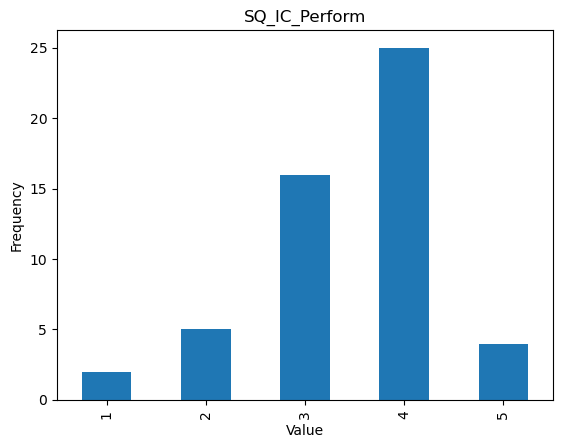

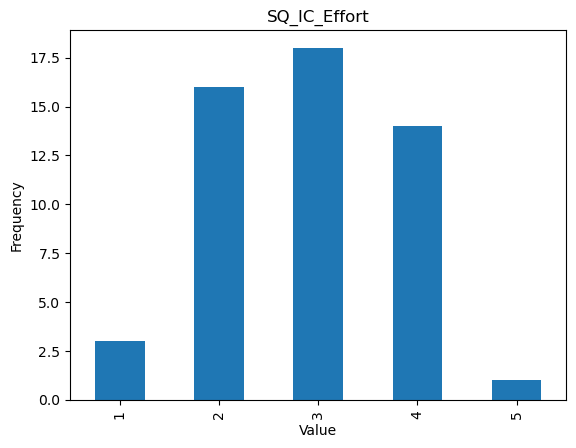

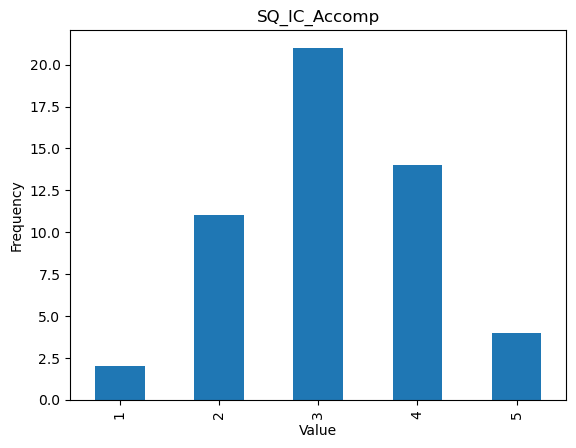

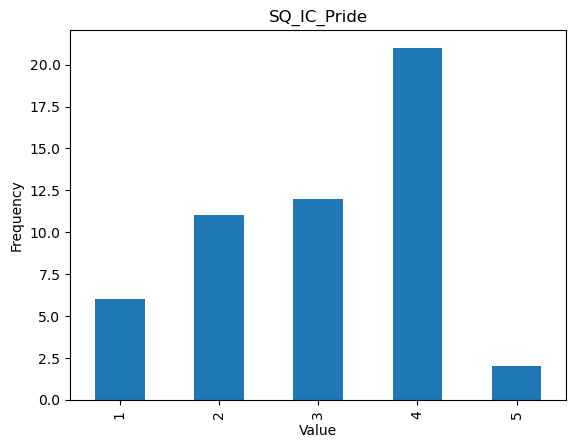

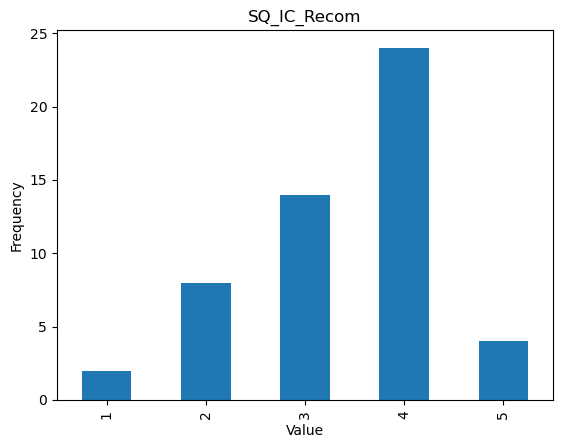

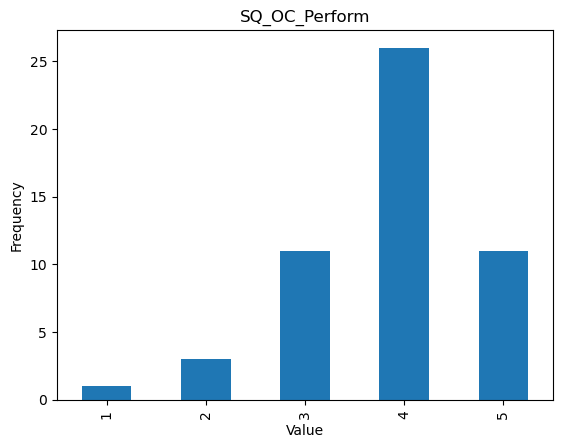

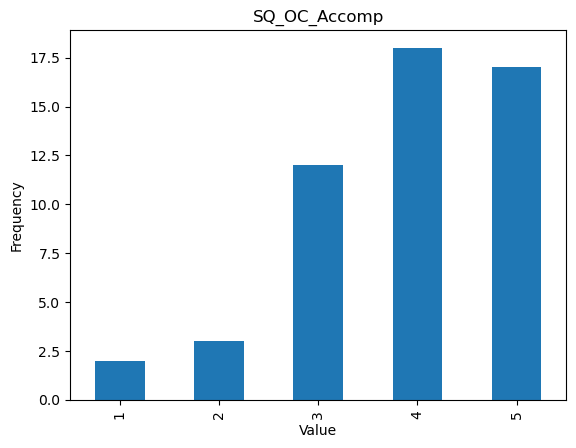

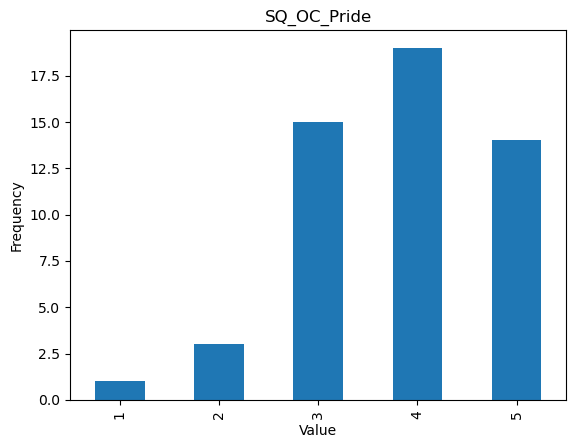

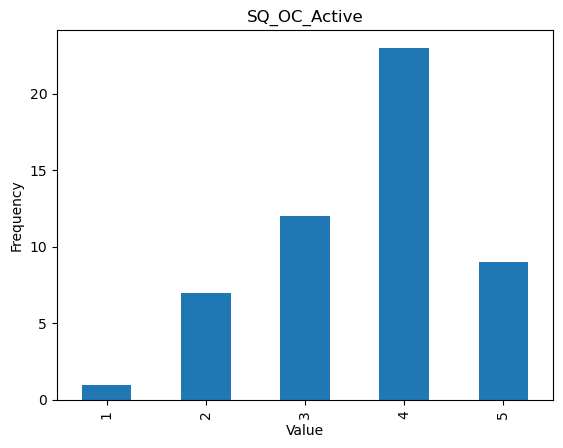

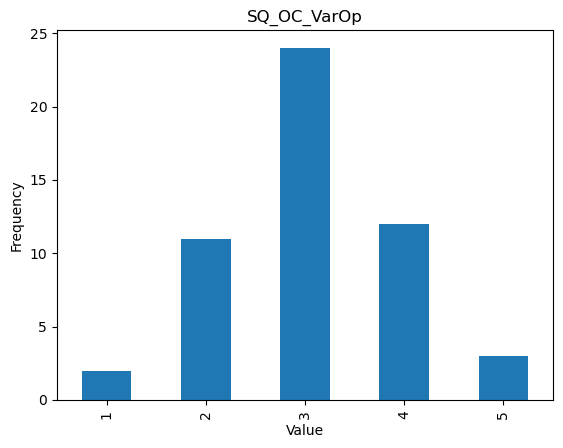

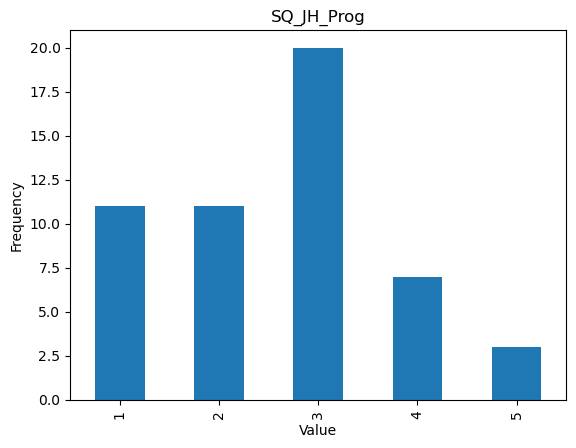

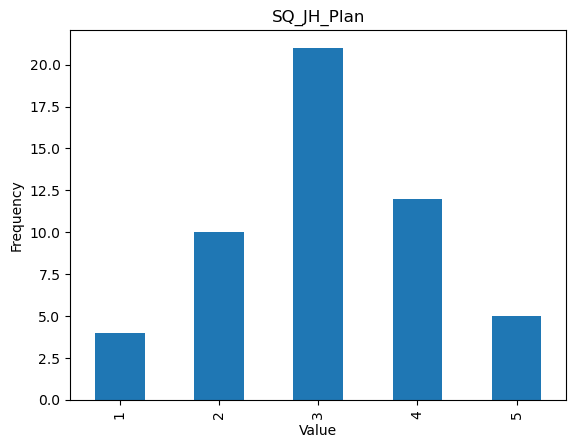

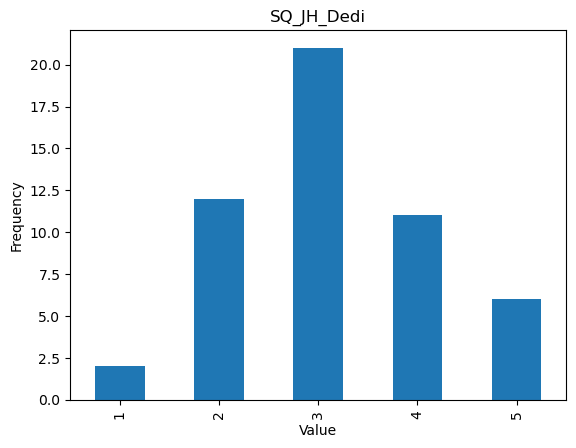

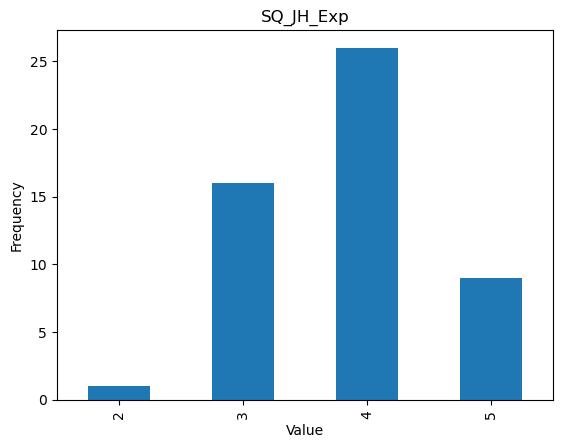

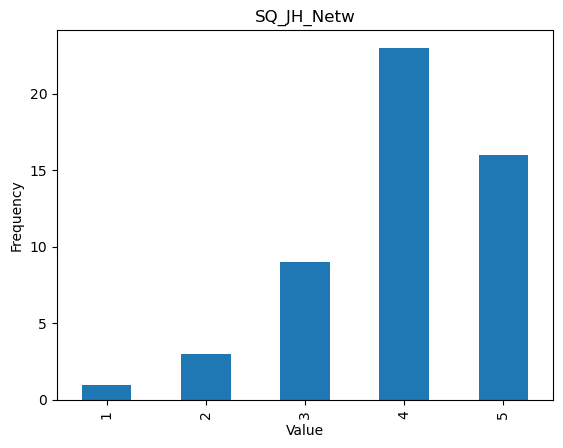

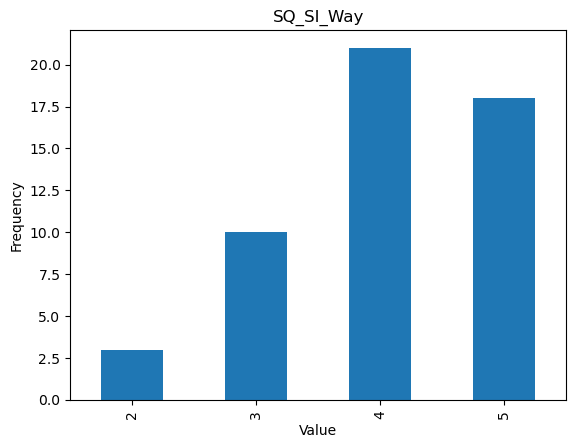

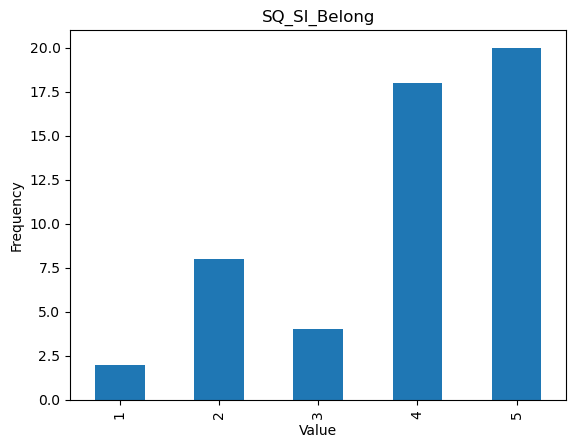

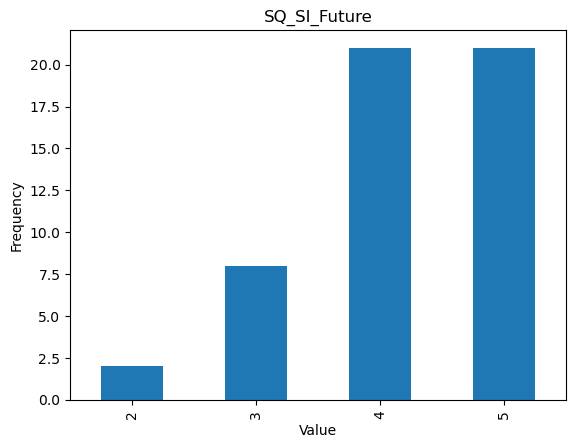

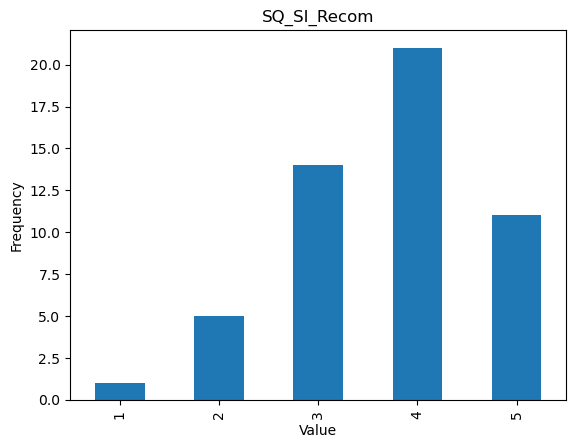

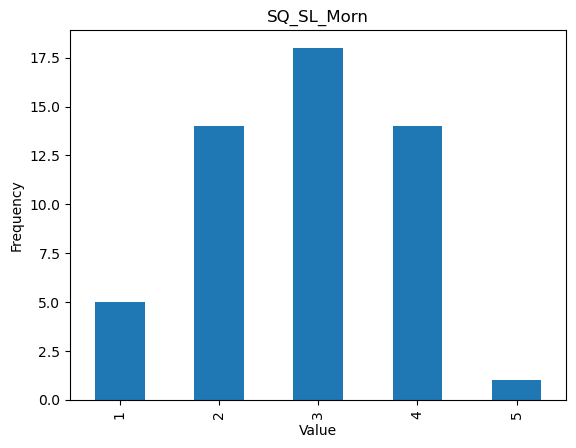

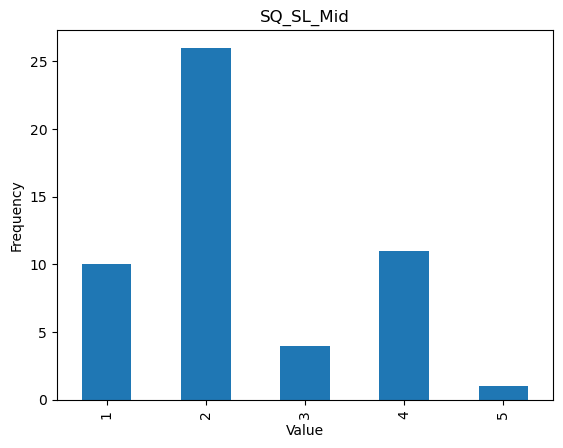

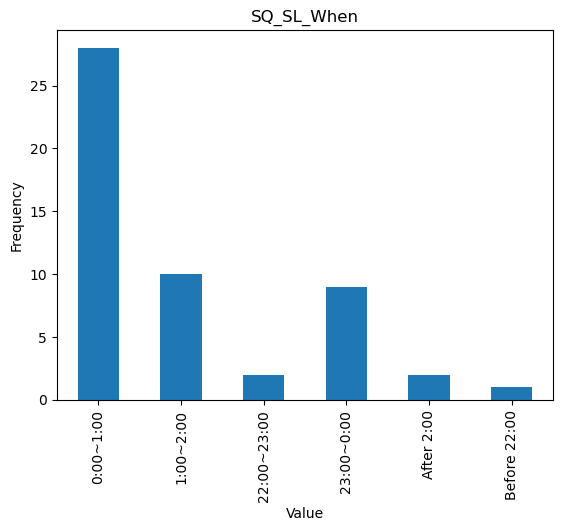

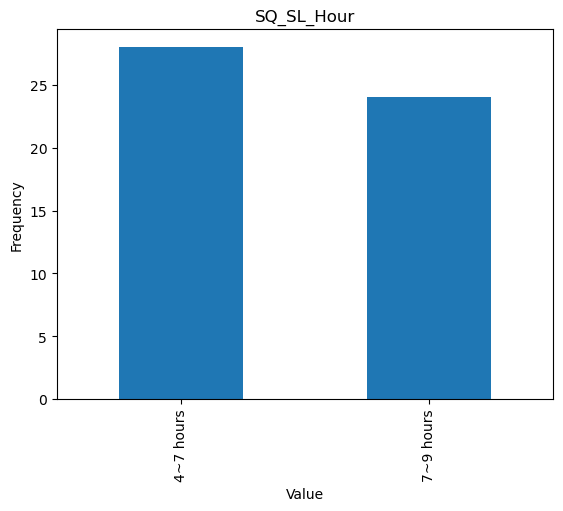

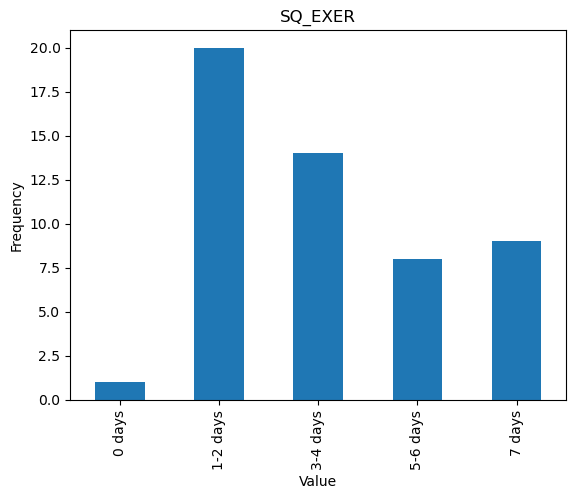

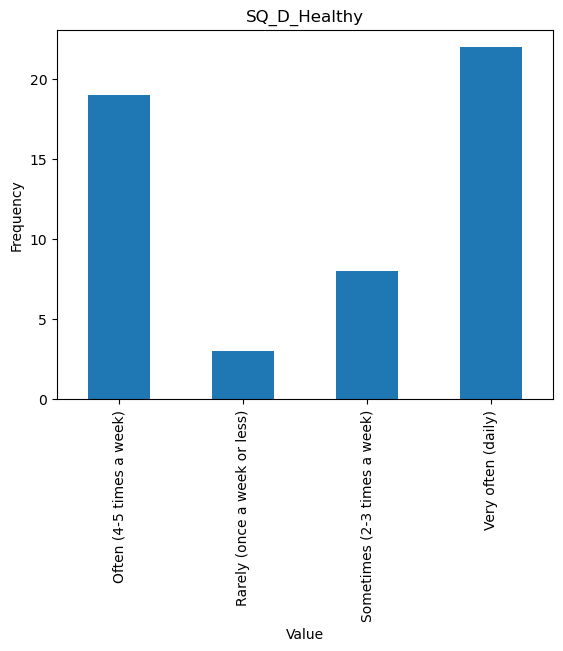

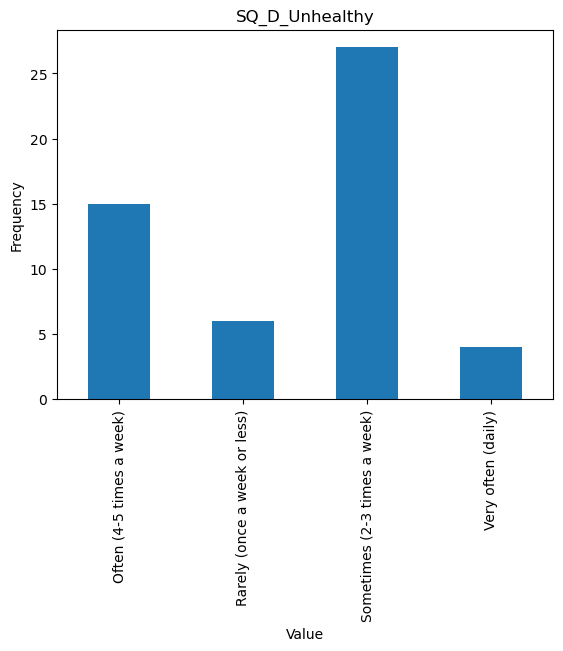

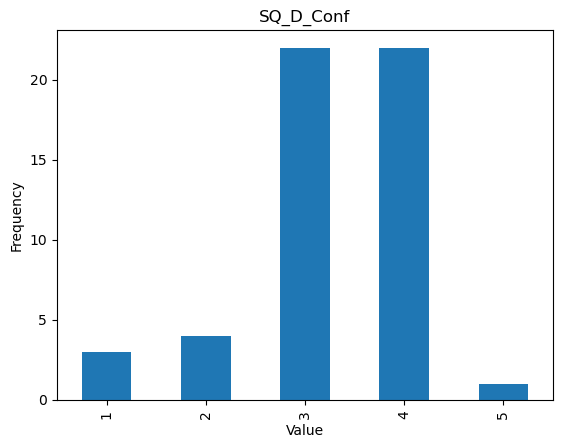

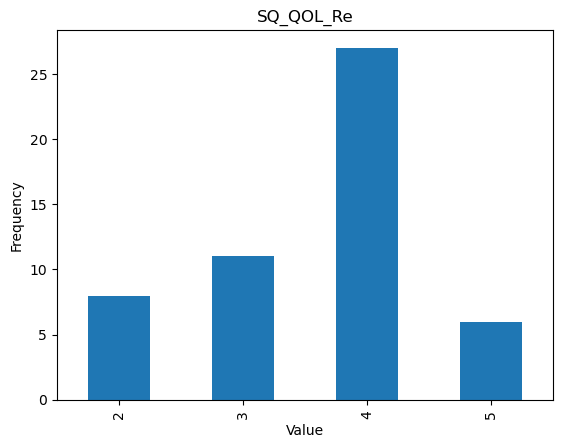

In [167]:
# create a frequency bar graph for each column
for column in df.columns:
    plt.figure()  
    df[column].value_counts().sort_index().plot(kind='bar')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.show()

# PCA and EFA and CFA

In [168]:
df.columns

Index(['Grade', 'Gender', 'Age', 'Nationality', 'Department', 'SQ_QOL',
       'SQ_IC_Perform', 'SQ_IC_Effort', 'SQ_IC_Accomp', 'SQ_IC_Pride',
       'SQ_IC_Recom', 'SQ_OC_Perform', 'SQ_OC_Accomp', 'SQ_OC_Pride',
       'SQ_OC_Active', 'SQ_OC_VarOp', 'SQ_JH_Prog', 'SQ_JH_Plan', 'SQ_JH_Dedi',
       'SQ_JH_Exp', 'SQ_JH_Netw', 'SQ_SI_Way', 'SQ_SI_Belong', 'SQ_SI_Future',
       'SQ_SI_Recom', 'SQ_SL_Morn', 'SQ_SL_Mid', 'SQ_SL_When', 'SQ_SL_Hour',
       'SQ_EXER', 'SQ_D_Healthy', 'SQ_D_Unhealthy', 'SQ_D_Conf', 'SQ_QOL_Re'],
      dtype='object')

In [169]:
factors = df_quant_SQ_STD.drop(columns = ['SQ_SL_Morn', 'SQ_SL_Mid', 'SQ_SL_When', 'SQ_SL_Hour',
       'SQ_EXER', 'SQ_D_Healthy', 'SQ_D_Unhealthy', 'SQ_D_Conf'])


In [170]:
# PCA

pca = PCA()
PrincipalComponent = pca.fit(factors)
eigenvalues = pca.explained_variance_
percentage_explained = pca.explained_variance_ratio_
cumulative_explained = np.cumsum(pca.explained_variance_ratio_)
table = pd.DataFrame({"eigenvalues": eigenvalues, 
                      "total % variance explained": percentage_explained * 100, 
                      "cumulative % variance explained": cumulative_explained * 100})
styler = table.style

# Apply bold formatting to values greater than 0.5
styler.applymap(lambda x: 'font-weight: bold' if x > 1.0 and x in table.iloc[:, 0].values else '')

# Display the dataframe with bolded values
styler

,eigenvalues,total % variance explained,cumulative % variance explained
0,4.939922,23.071062,23.071062
1,3.627471,16.941484,40.012546
2,3.117580,14.560127,54.572673
3,1.831581,8.554087,63.126759
4,1.657852,7.742716,70.869476
5,1.064867,4.973281,75.842757
6,0.863713,4.033825,79.876582
7,0.735889,3.436845,83.313427
8,0.567363,2.649773,85.963200
9,0.495220,2.312839,88.276039


In [171]:
# EFA (factor analysis)

fa = FactorAnalyzer(n_factors=5, method='principal', rotation="varimax")
fa.fit(factors)

row_names = ['SQ_QOL',
       'SQ_IC_Perform', 'SQ_IC_Effort', 'SQ_IC_Accomp', 'SQ_IC_Pride',
       'SQ_IC_Recom', 'SQ_OC_Perform', 'SQ_OC_Accomp', 'SQ_OC_Pride',
       'SQ_OC_Active', 'SQ_OC_VarOp', 'SQ_JH_Prog', 'SQ_JH_Plan', 'SQ_JH_Dedi',
       'SQ_JH_Exp', 'SQ_JH_Netw', 'SQ_SI_Way', 'SQ_SI_Belong', 'SQ_SI_Future',
       'SQ_SI_Recom','SQ_QOL_Re']
print("Rotated component matrix")
RCM = pd.DataFrame(np.array(fa.loadings_.round(3)), index=row_names)
styler = RCM.style

# Apply bold formatting to values greater than 0.5
styler.applymap(lambda x: 'font-weight: bold' if x > 0.6 else '')

# Display the dataframe with bolded values
styler

Rotated component matrix


,0,1,2,3,4
SQ_QOL,0.491000,0.117000,0.473000,-0.542000,-0.052000
SQ_IC_Perform,-0.176000,-0.366000,0.482000,0.099000,0.275000
SQ_IC_Effort,0.032000,-0.193000,0.785000,0.037000,0.232000
SQ_IC_Accomp,0.151000,0.185000,0.708000,-0.124000,-0.179000
SQ_IC_Pride,-0.199000,-0.085000,0.663000,0.014000,0.341000
SQ_IC_Recom,0.395000,0.020000,0.516000,0.397000,-0.393000
SQ_OC_Perform,0.194000,0.875000,0.137000,-0.001000,0.159000
SQ_OC_Accomp,0.052000,0.845000,-0.190000,0.010000,0.160000
SQ_OC_Pride,0.112000,0.894000,0.042000,0.110000,0.095000
SQ_OC_Active,0.020000,0.879000,-0.050000,0.068000,0.070000


In [172]:
# CFA

data = df_quant_SQ_STD[[ 'SQ_IC_Perform', 'SQ_IC_Effort', 'SQ_IC_Accomp', 'SQ_IC_Pride',
       'SQ_IC_Recom', 'SQ_OC_Perform', 'SQ_OC_Accomp', 'SQ_OC_Pride',
       'SQ_OC_Active', 'SQ_OC_VarOp', 'SQ_JH_Prog', 'SQ_JH_Plan', 'SQ_JH_Dedi',
       'SQ_JH_Exp', 'SQ_JH_Netw', 'SQ_SI_Way', 'SQ_SI_Belong', 'SQ_SI_Future',
       'SQ_SI_Recom']]

model_dict = {"In_Class": ['SQ_IC_Perform', 'SQ_IC_Effort', 'SQ_IC_Accomp', 'SQ_IC_Pride','SQ_IC_Recom'],
              "Out_Class": ['SQ_OC_Perform', 'SQ_OC_Accomp', 'SQ_OC_Pride','SQ_OC_Active', 'SQ_OC_VarOp'],
              "Career": ['SQ_JH_Prog', 'SQ_JH_Plan', 'SQ_JH_Dedi','SQ_JH_Exp', 'SQ_JH_Netw'],
              "Interact": ['SQ_SI_Way', 'SQ_SI_Belong', 'SQ_SI_Future','SQ_SI_Recom']}
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(data, model_dict)
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False)
cfa.fit(data.values)
cfa.loadings_ 

array([[0.58973056, 0.        , 0.        , 0.        ],
       [0.77629559, 0.        , 0.        , 0.        ],
       [0.3601885 , 0.        , 0.        , 0.        ],
       [0.72266162, 0.        , 0.        , 0.        ],
       [0.18931574, 0.        , 0.        , 0.        ],
       [0.        , 0.87827208, 0.        , 0.        ],
       [0.        , 0.83350556, 0.        , 0.        ],
       [0.        , 0.90495298, 0.        , 0.        ],
       [0.        , 0.84025114, 0.        , 0.        ],
       [0.        , 0.5423203 , 0.        , 0.        ],
       [0.        , 0.        , 0.6715871 , 0.        ],
       [0.        , 0.        , 0.73508927, 0.        ],
       [0.        , 0.        , 0.79769495, 0.        ],
       [0.        , 0.        , 0.50547387, 0.        ],
       [0.        , 0.        , 0.07771851, 0.        ],
       [0.        , 0.        , 0.        , 0.81263035],
       [0.        , 0.        , 0.        , 0.73069481],
       [0.        , 0.        ,

Do PCA (to see how many significant linearly-independent components are underlying) and FA (to see what kind of factors are significant in each components) for each dimentsion (constructs) too?

# Discriminant Validity 

# Reliability analysis (overalll and for each dimension constructs)

In [173]:
# overall cronbach
Satisf = df[['SQ_QOL',
       'SQ_IC_Perform', 'SQ_IC_Effort', 'SQ_IC_Accomp', 'SQ_IC_Pride',
       'SQ_IC_Recom', 'SQ_OC_Perform', 'SQ_OC_Accomp', 'SQ_OC_Pride',
       'SQ_OC_Active', 'SQ_OC_VarOp', 'SQ_JH_Prog', 'SQ_JH_Plan', 'SQ_JH_Dedi',
       'SQ_JH_Exp', 'SQ_JH_Netw', 'SQ_SI_Way', 'SQ_SI_Belong', 'SQ_SI_Future',
       'SQ_SI_Recom','SQ_QOL_Re']]

pg.cronbach_alpha(Satisf)
alpha = pg.cronbach_alpha(Satisf)
alpha_IC = [alpha[0],alpha[1][0], alpha[1][1]]

column_names = ["Cronbach's Alpha","95% confidence interval (bottom)","95% confidence interval (high)"]
CA = pd.DataFrame(alpha_IC, index = column_names).transpose()
CA

,Cronbach's Alpha,95% confidence interval (bottom),95% confidence interval (high)
0,0.780682,0.684,0.858


In [174]:
# Item-Total Stats (cronbach if item is deleted)

table = psy.cronbach_alpha_scale_if_deleted(Satisf)
table

/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/psython/__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if Item Deleted": scale_mean, "Scale Variance if Item Deleted": variance,
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/psython/__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if Item Deleted": scale_mean, "Scale Variance if Item Deleted": variance,
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/psython/__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if 

[(0.7806815538497326, array([0.684, 0.858])),
              Item  Scale Mean if Item Deleted  Scale Variance if Item Deleted  \
 0          SQ_QOL                   70.076923                       72.660633   
 1   SQ_IC_Perform                   70.153846                       77.191554   
 2    SQ_IC_Effort                   70.730769                       72.788839   
 3    SQ_IC_Accomp                   70.480769                       71.862368   
 4     SQ_IC_Pride                   70.576923                       73.621418   
 5     SQ_IC_Recom                   70.230769                       71.671192   
 6   SQ_OC_Perform                   69.788462                       67.777903   
 7    SQ_OC_Accomp                   69.750000                       70.073529   
 8     SQ_OC_Pride                   69.807692                       68.236802   
 9    SQ_OC_Active                   70.000000                       69.725490   
 10    SQ_OC_VarOp                   70.557692      

In [175]:
# Dimension 1: in-class satisfaction cronbach

DIM_IC = df[['SQ_IC_Perform', 'SQ_IC_Effort', 'SQ_IC_Accomp', 'SQ_IC_Pride',
       'SQ_IC_Recom']]

pg.cronbach_alpha(DIM_IC)
alpha = pg.cronbach_alpha(DIM_IC)
alpha_IC = [alpha[0],alpha[1][0], alpha[1][1]]

column_names = ["Cronbach's Alpha","95% confidence interval (bottom)","95% confidence interval (high)"]
CA = pd.DataFrame(alpha_IC, index = column_names).transpose()
CA

,Cronbach's Alpha,95% confidence interval (bottom),95% confidence interval (high)
0,0.681586,0.521,0.8


In [176]:
# Item-Total Stats (cronbach if item is deleted)

table = psy.cronbach_alpha_scale_if_deleted(DIM_IC)
table

/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/psython/__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if Item Deleted": scale_mean, "Scale Variance if Item Deleted": variance,
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/psython/__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if Item Deleted": scale_mean, "Scale Variance if Item Deleted": variance,
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/psython/__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if 

[(0.6815862627115663, array([0.521, 0.8  ])),
             Item  Scale Mean if Item Deleted  Scale Variance if Item Deleted  \
 0  SQ_IC_Perform                   12.442308                        7.898567   
 1   SQ_IC_Effort                   13.019231                        6.881976   
 2   SQ_IC_Accomp                   12.769231                        7.475113   
 3    SQ_IC_Pride                   12.865385                        6.589367   
 4    SQ_IC_Recom                   12.519231                        8.176094   
 
    Corrected Item-Total Correlation  Cronbach's Alpha if Item Deleted  
 0                          0.383172                          0.652822  
 1                          0.595664                          0.561357  
 2                          0.433048                          0.632230  
 3                          0.499903                          0.600935  
 4                          0.286170                          0.693139  ]

In [177]:
# Dimension 2: out of class satisfaction cronbach

DIM_OC = df[['SQ_OC_Perform', 'SQ_OC_Accomp', 'SQ_OC_Pride',
       'SQ_OC_Active', 'SQ_OC_VarOp']]

alpha = pg.cronbach_alpha(DIM_OC)
alpha_OC = [alpha[0],alpha[1][0], alpha[1][1]]
column_names = ["Cronbach's Alpha","95% confidence interval (bottom)","95% confidence interval (high)"]
CA = pd.DataFrame(alpha_OC, index = column_names).transpose()
CA

,Cronbach's Alpha,95% confidence interval (bottom),95% confidence interval (high)
0,0.898265,0.847,0.936


In [178]:
# Item-Total Stats (cronbach if item is deleted)

table = psy.cronbach_alpha_scale_if_deleted(DIM_OC)
table

/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/psython/__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if Item Deleted": scale_mean, "Scale Variance if Item Deleted": variance,
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/psython/__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if Item Deleted": scale_mean, "Scale Variance if Item Deleted": variance,
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/psython/__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if 

[(0.8982645055414427, array([0.847, 0.936])),
             Item  Scale Mean if Item Deleted  Scale Variance if Item Deleted  \
 0  SQ_OC_Perform                   14.346154                       11.093514   
 1   SQ_OC_Accomp                   14.307692                       10.452489   
 2    SQ_OC_Pride                   14.365385                       10.589367   
 3   SQ_OC_Active                   14.557692                       10.408371   
 4    SQ_OC_VarOp                   15.115385                       12.496229   
 
    Corrected Item-Total Correlation  Cronbach's Alpha if Item Deleted  
 0                          0.810558                          0.863721  
 1                          0.751199                          0.876479  
 2                          0.829455                          0.857743  
 3                          0.839294                          0.855076  
 4                          0.530564                          0.919332  ]

In [179]:
# Dimension 3: job hunting/ career planning cronbach

DIM_JH = df[['SQ_JH_Prog', 'SQ_JH_Plan', 'SQ_JH_Dedi',
       'SQ_JH_Exp', 'SQ_JH_Netw']]

alpha = pg.cronbach_alpha(DIM_JH)
alpha_JH = [alpha[0],alpha[1][0], alpha[1][1]]
column_names = ["Cronbach's Alpha","95% confidence interval (bottom)","95% confidence interval (high)"]
CA = pd.DataFrame(alpha_JH, index = column_names).transpose()
CA

,Cronbach's Alpha,95% confidence interval (bottom),95% confidence interval (high)
0,0.689096,0.532,0.805


In [180]:
# Item-Total Stats (cronbach if item is deleted)

table = psy.cronbach_alpha_scale_if_deleted(DIM_JH)
table

/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/psython/__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if Item Deleted": scale_mean, "Scale Variance if Item Deleted": variance,
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/psython/__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if Item Deleted": scale_mean, "Scale Variance if Item Deleted": variance,
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/psython/__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if 

[(0.6890959637561779, array([0.532, 0.805])),
          Item  Scale Mean if Item Deleted  Scale Variance if Item Deleted  \
 0  SQ_JH_Prog                   14.000000                        6.823529   
 1  SQ_JH_Plan                   13.538462                        6.684766   
 2  SQ_JH_Dedi                   13.480769                        6.764329   
 3   SQ_JH_Exp                   12.788462                        8.209276   
 4  SQ_JH_Netw                   12.653846                        9.407240   
 
    Corrected Item-Total Correlation  Cronbach's Alpha if Item Deleted  
 0                          0.480564                          0.624079  
 1                          0.576464                          0.575662  
 2                          0.590467                          0.570526  
 3                          0.532671                          0.620030  
 4                          0.116602                          0.762225  ]

In [181]:
# Dimension 4: student interaction cronbach

DIM_SI = df[['SQ_SI_Way', 'SQ_SI_Belong', 'SQ_SI_Future',
       'SQ_SI_Recom']]

alpha = pg.cronbach_alpha(DIM_SI)
alpha_SI = [alpha[0],alpha[1][0], alpha[1][1]]
column_names = ["Cronbach's Alpha","95% confidence interval (bottom)","95% confidence interval (high)"]
CA = pd.DataFrame(alpha_SI, index = column_names).transpose()
CA

,Cronbach's Alpha,95% confidence interval (bottom),95% confidence interval (high)
0,0.851022,0.772,0.908


In [182]:
# Item-Total Stats (cronbach if item is deleted)

table = psy.cronbach_alpha_scale_if_deleted(DIM_SI)
table

/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/psython/__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if Item Deleted": scale_mean, "Scale Variance if Item Deleted": variance,
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/psython/__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if Item Deleted": scale_mean, "Scale Variance if Item Deleted": variance,
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/psython/__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if 

[(0.8510219157842895, array([0.772, 0.908])),
            Item  Scale Mean if Item Deleted  Scale Variance if Item Deleted  \
 0     SQ_SI_Way                   11.750000                        6.583333   
 1  SQ_SI_Belong                   11.903846                        5.500377   
 2  SQ_SI_Future                   11.615385                        6.751131   
 3   SQ_SI_Recom                   12.096154                        6.480769   
 
    Corrected Item-Total Correlation  Cronbach's Alpha if Item Deleted  
 0                          0.738493                          0.794891  
 1                          0.672396                          0.834579  
 2                          0.755531                          0.792895  
 3                          0.655918                          0.825275  ]

# Independent sample t test

In [183]:
### perform independent sample t test to determine the threshhold level of sleep, exercise, and diet that will significantly create difference in satisfaction measure
# first, create a overall satisfaction measure.
# should we eliminate some questions according to reliability test?
CORE_score = (df['SQ_QOL']+df['SQ_QOL_Re'])/2
IC_score = (df['SQ_IC_Perform']+df['SQ_IC_Effort']+df['SQ_IC_Accomp']+df['SQ_IC_Pride']+df['SQ_IC_Recom'])/5
OC_score = (df['SQ_OC_Perform']+df['SQ_OC_Accomp']+df['SQ_OC_Pride']+df['SQ_OC_Active']+df['SQ_OC_VarOp'])/5
JH_score = (df['SQ_JH_Prog']+df['SQ_JH_Plan']+df['SQ_JH_Dedi']+df['SQ_JH_Exp']+df['SQ_JH_Netw'])/5
SI_score = (df['SQ_SI_Way']+df['SQ_SI_Belong']+df['SQ_SI_Future']+df['SQ_JH_Exp']+df['SQ_SI_Recom'])/4

AGG_score = CORE_score + IC_score + OC_score + JH_score + SI_score
AGG_score

0     17.15
1     20.35
2     17.60
3     15.75
4     17.45
5     20.85
6     16.60
7     21.00
8     23.75
9     20.05
10    19.65
11    13.80
12    21.00
13    18.80
14    18.65
15    18.30
16    17.50
17    22.25
18    18.80
19    17.40
20    20.70
21    20.70
22    12.40
23    21.25
24    19.15
25    19.40
26    18.10
27    19.75
28    19.85
29    16.10
30    15.80
31    17.45
32    19.50
33    20.65
34    15.75
35    19.90
36    18.50
37    18.60
38    17.55
39    18.45
40    19.15
41    15.80
42    15.40
43    17.90
44    21.85
45    20.70
46    19.00
47    22.50
48    16.75
49    18.80
50    18.65
51    14.95
dtype: float64

In [184]:
# append scores to dataframe
df["CORE_score"] = CORE_score
df["IC_score"] = IC_score
df["OC_score"] = OC_score
df["JH_score"] = JH_score
df["SI_score"] = SI_score
df["AGG_score"] = AGG_score

In [185]:
# info of the column to create a group for t test
df["SQ_SL_When"].value_counts()

0:00~1:00       28
1:00~2:00       10
23:00~0:00       9
22:00~23:00      2
After 2:00       2
Before 22:00     1
Name: SQ_SL_When, dtype: int64

In [186]:
# set groups for SQ_SL_When

df_SL_When_1 = df[df["SQ_SL_When"] == "Before 22:00"]
df_SL_When_2 = df[df["SQ_SL_When"] == "22:00~23:00"]
df_SL_When_3 = df[df["SQ_SL_When"] == "23:00~0:00"]
df_SL_When_4 = df[df["SQ_SL_When"] == "0:00~1:00"]
df_SL_When_5 = df[df["SQ_SL_When"] == "1:00~2:00"]
df_SL_When_6 = df[df["SQ_SL_When"] == "After 2:00"]

In [187]:
# concat groups to make 2 groups. 
# 2 groups represent healthy group and unhealthy group
# all possible grouping of 2 groups will be tested

def div_comb(level_sorted_groups, measure_column):
    combs = []
    lsg = level_sorted_groups 
    for i in range(1,len(level_sorted_groups)):
        #print(i)
        group1 = pd.concat(lsg[0:i], ignore_index=True)[measure_column]
        group2 = pd.concat(lsg[i:len(lsg)], ignore_index=True)[measure_column]
        #print(group1, group2)
        combs.append([group1, group2])
    return combs


In [188]:
# function for levene test and independent sample t test

def lev_ind(group1, group2):

    _, p_value_levene = stats.levene(group1, group2)

    # Perform independent samples t-test based on Levene test result
    if p_value_levene >= 0.05:
        # Equal variances assumed
        t_statistic, p_value_ttest = stats.ttest_ind(group1, group2, equal_var=True)
        test_result = "Equal variances assumed"
    else:
        # Unequal variances assumed
        t_statistic, p_value_ttest = stats.ttest_ind(group1, group2, equal_var=False)
        test_result = "Unequal variances assumed"

    # Display the test results
    #print("group1 (healthier) average", group1.mean())
    #print("group2 (unhealthier) average", group2.mean())
    #print("Levene Test: p-value =", p_value_levene)
    #print("Independent Samples T-test:", test_result)
    #print("t-statistic:", t_statistic)
    #print("p-value:", p_value_ttest)
    #print("\n")
    
    return [group1.mean(),group2.mean(),p_value_levene,test_result,t_statistic,p_value_ttest]
    



In [189]:
def result_df(column, index, combs):
    results = []
    for comb in combs:
        result = lev_ind(comb[0], comb[1])
        results.append(result)
    #print(results)
    return pd.DataFrame(results, columns = column, index = index)
    

In [190]:
columns = ["group1 (healthier) average",
           "group2 (unhealthier) average", 
           "Levene Test: p-value =", 
           "Levene test result:",
           "Independent Samples T-test t-statistic:",
           "Independent Samples T-test p-value:"]

In [191]:
groups = [df_SL_When_1,df_SL_When_2,df_SL_When_3,df_SL_When_4,df_SL_When_5,df_SL_When_6]
combs = div_comb(groups, "AGG_score")


index = ["22:00", "23:00", "0:00", "1:00", "2:00"]

result_df(columns, index, combs)

/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_5525/732932779.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value_ttest = stats.ttest_ind(group1, group2, equal_var=True)
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,group1 (healthier) average,group2 (unhealthier) average,Levene Test: p-value =,Levene test result:,Independent Samples T-test t-statistic:,Independent Samples T-test p-value:
22:00,18.450000,18.612745,0.222365,Equal variances assumed,NaN,NaN
23:00,18.683333,18.605102,0.038608,Unequal variances assumed,0.221744,0.825529
0:00,19.508333,18.340000,0.054108,Equal variances assumed,1.593085,0.117444
1:00,19.021250,17.237500,0.570711,Equal variances assumed,2.518809,0.015020
2:00,18.791000,14.075000,0.961586,Equal variances assumed,3.131587,0.002904


In [192]:
df["SQ_SL_Hour"].value_counts()

4~7 hours    28
7~9 hours    24
Name: SQ_SL_Hour, dtype: int64

In [193]:
# for sleep hours
# set groups

group1 = df[df["SQ_SL_Hour"] == "4~7 hours"]
group2 = df[df["SQ_SL_Hour"] == "7~9 hours"]

sorted_group = [group2, group1]

# columns are same

# set index
index = ["7 hours"]


# compute combinations with div_comb(good_to_bad_sorted_groups, measure_column)
measure_column = "AGG_score"
combs = div_comb(sorted_group, measure_column)

# create result matrix with result_df(column, index, combs)
result_df(columns, index, combs)



,group1 (healthier) average,group2 (unhealthier) average,Levene Test: p-value =,Levene test result:,Independent Samples T-test t-statistic:,Independent Samples T-test p-value:
7 hours,18.695833,18.535714,0.012262,Unequal variances assumed,0.262561,0.794121


In [194]:
print(df["SQ_SL_Morn"].value_counts())
pd.unique(df["SQ_SL_Morn"])

3    18
4    14
2    14
1     5
5     1
Name: SQ_SL_Morn, dtype: int64


array([4, 1, 5, 2, 3])

In [195]:
# for subjective sleep quality felt in the morning
# set groups

group5 = df[df["SQ_SL_Morn"] == 1]
group4 = df[df["SQ_SL_Morn"] == 2]
group3 = df[df["SQ_SL_Morn"] == 3]
group2 = df[df["SQ_SL_Morn"] == 4]
group1 = df[df["SQ_SL_Morn"] == 5]

sorted_group = [group1, group2, group3, group4, group5]

# columns are same

# set index
index = ["confidence level 5", "confidence level 4", "confidence level 3", "confidence level 2"]

# compute combinations with div_comb(good_to_bad_sorted_groups, measure_column)
measure_column = "AGG_score"
combs = div_comb(sorted_group, measure_column)

# create result matrix with result_df(column, index, combs)
result_df(columns, index, combs)

/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_5525/732932779.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value_ttest = stats.ttest_ind(group1, group2, equal_var=True)
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,group1 (healthier) average,group2 (unhealthier) average,Levene Test: p-value =,Levene test result:,Independent Samples T-test t-statistic:,Independent Samples T-test p-value:
confidence level 5,20.850000,18.565686,0.231787,Equal variances assumed,NaN,NaN
confidence level 4,19.416667,18.282432,0.526661,Equal variances assumed,1.666834,0.101800
confidence level 3,19.312121,17.389474,0.162365,Equal variances assumed,3.210152,0.002319
confidence level 2,18.517021,19.480000,0.396396,Equal variances assumed,-0.903583,0.370549


In [196]:
print(df["SQ_SL_Mid"].value_counts())
pd.unique(df["SQ_SL_Mid"])

2    26
4    11
1    10
3     4
5     1
Name: SQ_SL_Mid, dtype: int64


array([4, 5, 2, 1, 3])

In [197]:
# for subjective sleep quality felt in the midday
# set groups

group5 = df[df["SQ_SL_Mid"] == 1]
group4 = df[df["SQ_SL_Mid"] == 2]
group3 = df[df["SQ_SL_Mid"] == 3]
group2 = df[df["SQ_SL_Mid"] == 4]
group1 = df[df["SQ_SL_Mid"] == 5]

sorted_group = [group1, group2, group3, group4, group5]

# columns are same

# set index
index = ["confidence level 5", "confidence level 4", "confidence level 3", "confidence level 2"]

# compute combinations with div_comb(good_to_bad_sorted_groups, measure_column)
measure_column = "AGG_score"
combs = div_comb(sorted_group, measure_column)

# create result matrix with result_df(column, index, combs)
result_df(columns, index, combs)

/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_5525/732932779.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value_ttest = stats.ttest_ind(group1, group2, equal_var=True)
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,group1 (healthier) average,group2 (unhealthier) average,Levene Test: p-value =,Levene test result:,Independent Samples T-test t-statistic:,Independent Samples T-test p-value:
confidence level 5,20.350000,18.575490,0.229668,Equal variances assumed,NaN,NaN
confidence level 4,18.941667,18.510000,0.476670,Equal variances assumed,0.576111,0.567125
confidence level 3,18.915625,18.473611,0.347471,Equal variances assumed,0.646780,0.520733
confidence level 2,18.704762,18.210000,0.948243,Equal variances assumed,0.617979,0.539394


In [198]:
print(df["SQ_EXER"].value_counts())
pd.unique(df["SQ_EXER"])

1-2 days    20
3-4 days    14
7 days       9
5-6 days     8
0 days       1
Name: SQ_EXER, dtype: int64


array(['7 days', '5-6 days', '1-2 days', '3-4 days', '0 days'],
      dtype=object)

In [199]:
# for samount of exercise
# set groups

group1 = df[df["SQ_EXER"] == '7 days']
group2 = df[df["SQ_EXER"] == '5-6 days']
group3 = df[df["SQ_EXER"] == '3-4 days']
group4 = df[df["SQ_EXER"] == '1-2 days']
group5 = df[df["SQ_EXER"] == '0 days']

sorted_group = [group1, group2, group3, group4, group5]

# columns are same

# set index
index = ["1 day", "3 days", "5 days", "7 days"]

# compute combinations with div_comb(good_to_bad_sorted_groups, measure_column)
measure_column = "AGG_score"
combs = div_comb(sorted_group, measure_column)

# create result matrix with result_df(column, index, combs)
result_df(columns, index, combs)

/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_5525/732932779.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value_ttest = stats.ttest_ind(group1, group2, equal_var=True)
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,group1 (healthier) average,group2 (unhealthier) average,Levene Test: p-value =,Levene test result:,Independent Samples T-test t-statistic:,Independent Samples T-test p-value:
1 day,18.633333,18.604651,0.066662,Equal variances assumed,0.034259,0.972807
3 days,19.055882,18.392857,0.019874,Unequal variances assumed,1.219681,0.228337
5 days,18.803226,18.323810,0.025154,Unequal variances assumed,0.689362,0.495666
7 days,18.592157,19.500000,0.223472,Equal variances assumed,NaN,NaN


In [200]:
print(df["SQ_D_Healthy"].value_counts())
pd.unique(df["SQ_D_Healthy"])

Very often (daily)              22
Often (4-5 times a week)        19
Sometimes (2-3 times a week)     8
Rarely (once a week or less)     3
Name: SQ_D_Healthy, dtype: int64


array(['Very often (daily)', 'Often (4-5 times a week)',
       'Rarely (once a week or less)', 'Sometimes (2-3 times a week)'],
      dtype=object)

In [201]:
# for consumption of healthy food
# set groups

group1 = df[df["SQ_D_Healthy"] == "Very often (daily)"]
group2 = df[df["SQ_D_Healthy"] == "Often (4-5 times a week)"]
group3 = df[df["SQ_D_Healthy"] == "Sometimes (2-3 times a week)"]
group4 = df[df["SQ_D_Healthy"] == "Rarely (once a week or less)"]

sorted_group = [group1, group2, group3, group4]

# columns are same

# set index
index = ["2 times per week", "4 times per week", "6 times per week"]

# compute combinations with div_comb(good_to_bad_sorted_groups, measure_column)
measure_column = "AGG_score"
combs = div_comb(sorted_group, measure_column)

# create result matrix with result_df(column, index, combs)
result_df(columns, index, combs)

,group1 (healthier) average,group2 (unhealthier) average,Levene Test: p-value =,Levene test result:,Independent Samples T-test t-statistic:,Independent Samples T-test p-value:
2 times per week,18.804545,18.466667,0.769488,Equal variances assumed,0.528497,0.599492
4 times per week,18.939024,17.381818,0.608914,Equal variances assumed,2.094062,0.041345
6 times per week,18.719388,16.816667,0.380574,Equal variances assumed,1.428979,0.159228


In [202]:
print(df["SQ_D_Unhealthy"].value_counts())
pd.unique(df["SQ_D_Unhealthy"])

Sometimes (2-3 times a week)    27
Often (4-5 times a week)        15
Rarely (once a week or less)     6
Very often (daily)               4
Name: SQ_D_Unhealthy, dtype: int64


array(['Sometimes (2-3 times a week)', 'Often (4-5 times a week)',
       'Very often (daily)', 'Rarely (once a week or less)'], dtype=object)

In [203]:
# for consumption of unhealthy food
# set groups

group4 = df[df["SQ_D_Unhealthy"] == "Very often (daily)"]
group3 = df[df["SQ_D_Unhealthy"] == "Often (4-5 times a week)"]
group2 = df[df["SQ_D_Unhealthy"] == "Sometimes (2-3 times a week)"]
group1 = df[df["SQ_D_Unhealthy"] == "Rarely (once a week or less)"]

sorted_group = [group1, group2, group3, group4]

# columns are same

# set index
index = ["2 times per week", "4 times per week", "6 times per week"]

# compute combinations with div_comb(good_to_bad_sorted_groups, measure_column)
measure_column = "AGG_score"
combs = div_comb(sorted_group, measure_column)

# create result matrix with result_df(column, index, combs)
result_df(columns, index, combs)

,group1 (healthier) average,group2 (unhealthier) average,Levene Test: p-value =,Levene test result:,Independent Samples T-test t-statistic:,Independent Samples T-test p-value:
2 times per week,19.291667,18.520652,0.215490,Equal variances assumed,0.782456,0.437637
4 times per week,18.930303,18.052632,0.280713,Equal variances assumed,1.358750,0.180324
6 times per week,18.580208,18.962500,0.703691,Equal variances assumed,-0.321955,0.748829


In [204]:
print(df["SQ_D_Conf"].value_counts())
pd.unique(df["SQ_D_Conf"])

4    22
3    22
2     4
1     3
5     1
Name: SQ_D_Conf, dtype: int64


array([4, 3, 2, 5, 1])

In [205]:
# for confidence in diet
# set groups

group5 = df[df["SQ_D_Conf"] == 1]
group4 = df[df["SQ_D_Conf"] == 2]
group3 = df[df["SQ_D_Conf"] == 3]
group2 = df[df["SQ_D_Conf"] == 4]
group1 = df[df["SQ_D_Conf"] == 5]

sorted_group = [group1, group2, group3, group4, group5]

# columns are same

# set index
index = ["confidence level 2", "confidence level 3", "confidence level 4", "confidence level 5"]

# compute combinations with div_comb(good_to_bad_sorted_groups, measure_column)
measure_column = "AGG_score"
combs = div_comb(sorted_group, measure_column)

# create result matrix with result_df(column, index, combs)
result_df(columns, index, combs)

/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_5525/732932779.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value_ttest = stats.ttest_ind(group1, group2, equal_var=True)
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/yugonagatake/opt/anaconda3/envs/zemi/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,group1 (healthier) average,group2 (unhealthier) average,Levene Test: p-value =,Levene test result:,Independent Samples T-test t-statistic:,Independent Samples T-test p-value:
confidence level 2,17.400000,18.633333,0.231888,Equal variances assumed,NaN,NaN
confidence level 3,18.354348,18.812069,0.773555,Equal variances assumed,-0.721461,0.473986
confidence level 4,18.785556,17.478571,0.983287,Equal variances assumed,1.437196,0.156891
confidence level 5,18.757143,16.200000,0.396945,Equal variances assumed,1.952880,0.056443


In [206]:
# for difference between core question and revisited core question

# columns 
columns = ["Core question (first question) average",
           "Revisited Core question (last question) average", 
           "Levene Test: p-value =", 
           "Levene test result:",
           "Independent Samples T-test t-statistic:",
           "Independent Samples T-test p-value:"]

# set index
index = ["is there difference is first Q and last Q"]

# create result matrix with result_df(column, index, combs)
result_df(columns, index, [[df["SQ_QOL"], df["SQ_QOL_Re"]]])


# what about differnce in individual level? even if the average did not change, there may be predictabole difference in independent level

,Core question (first question) average,Revisited Core question (last question) average,Levene Test: p-value =,Levene test result:,Independent Samples T-test t-statistic:,Independent Samples T-test p-value:
is there difference is first Q and last Q,3.538462,3.596154,0.703862,Equal variances assumed,-0.333333,0.739567


we can do t tests for basic student information if we want to 

# Multiple Linear Regression

In [224]:
# create aggregae score for each lifestyle measure to avoid multico

# for sleep
AGG_sleep = (df_quant_SQ_STD["SQ_SL_Morn"] + df_quant_SQ_STD["SQ_SL_Mid"] + df_quant_SQ_STD["SQ_SL_When"] + df_quant_SQ_STD["SQ_SL_Hour"])/4

# exercise only has one measure

# for diet
AGG_diet = (df_quant_SQ_STD["SQ_D_Healthy"] + df_quant_SQ_STD["SQ_D_Unhealthy"] + df_quant_SQ_STD["SQ_D_Conf"])/3

df_quant["AGG_sleep"] = AGG_sleep
df_quant["AGG_diet"] = AGG_diet
df_quant['AGG_score'] = AGG_score
df_quant["CORE_score"] = CORE_score
df_quant["IC_score"] = IC_score
df_quant["OC_score"] = OC_score
df_quant["JH_score"] = JH_score
df_quant["SI_score"] = SI_score


In [225]:
ind = df_quant[["AGG_sleep",'SQ_EXER',"AGG_diet"]]
dep = df_quant['AGG_score']

# Add a constant column to the independent variables
ind = sm.add_constant(ind)

# Fit the multiple linear regression model
model = sm.OLS(dep, ind)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              AGG_score   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.636
Date:                Wed, 17 May 2023   Prob (F-statistic):              0.193
Time:                        00:27:07   Log-Likelihood:                -113.18
No. Observations:                  52   AIC:                             234.4
Df Residuals:                      48   BIC:                             242.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.4528      1.118     17.394      0.0

In [226]:
ind = df_quant[["AGG_sleep",'SQ_EXER',"AGG_diet"]]
dep = df_quant['SQ_QOL']

# Add a constant column to the independent variables
ind = sm.add_constant(ind)

# Fit the multiple linear regression model
model = sm.OLS(dep, ind)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 SQ_QOL   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     2.634
Date:                Wed, 17 May 2023   Prob (F-statistic):             0.0605
Time:                        00:27:07   Log-Likelihood:                -62.292
No. Observations:                  52   AIC:                             132.6
Df Residuals:                      48   BIC:                             140.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2603      0.420      7.757      0.0

In [227]:
ind = df_quant[["AGG_sleep",'SQ_EXER',"AGG_diet"]]
dep = df_quant['SQ_QOL_Re']

# Add a constant column to the independent variables
ind = sm.add_constant(ind)

# Fit the multiple linear regression model
model = sm.OLS(dep, ind)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SQ_QOL_Re   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     2.840
Date:                Wed, 17 May 2023   Prob (F-statistic):             0.0477
Time:                        00:27:08   Log-Likelihood:                -63.051
No. Observations:                  52   AIC:                             134.1
Df Residuals:                      48   BIC:                             141.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1749      0.426      7.445      0.0

In [228]:
# full model without student info

ind = df_quant[["AGG_sleep",'SQ_EXER',"AGG_diet", "IC_score", "OC_score", "JH_score", "SI_score"]]
dep = df_quant['CORE_score']

# Add a constant column to the independent variables
ind = sm.add_constant(ind)

# Fit the multiple linear regression model
model = sm.OLS(dep, ind)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             CORE_score   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     8.259
Date:                Wed, 17 May 2023   Prob (F-statistic):           2.10e-06
Time:                        00:27:09   Log-Likelihood:                -35.891
No. Observations:                  52   AIC:                             87.78
Df Residuals:                      44   BIC:                             103.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3837      0.772     -0.497      0.6

In [229]:
print(df_quant["Grade"].value_counts())
print(df_quant["Gender"].value_counts())
print(df_quant["Age"].value_counts())
print(df_quant["Nationality"].value_counts())

2    23
3    16
4     9
1     4
Name: Grade, dtype: int64
male      32
female    20
Name: Gender, dtype: int64
20    33
19     6
22     6
21     5
23     1
25     1
Name: Age, dtype: int64
Japan            44
Outside Japan     8
Name: Nationality, dtype: int64


In [230]:
# get dummies for gender and nationality

# use age as it is

# transform grade in to integer
df_quant = df.replace({"Grade":{"4th": 4, "3rd": 3, "2nd": 2, "1st": 1}})



In [231]:
Gen_dum = pd.get_dummies(df_quant["Gender"], drop_first=True)
Nat_dum = pd.get_dummies(df_quant["Nationality"], drop_first=True)
df_quant = pd.concat([df_quant, Gen_dum], axis=1)
df_quant = pd.concat([df_quant, Nat_dum], axis=1)

df_quant["SQ_EXER"] = df_quant_SQ["SQ_EXER"]

df_quant



,Grade,Gender,Age,Nationality,Department,SQ_QOL,SQ_IC_Perform,SQ_IC_Effort,SQ_IC_Accomp,SQ_IC_Pride,SQ_IC_Recom,SQ_OC_Perform,SQ_OC_Accomp,SQ_OC_Pride,SQ_OC_Active,SQ_OC_VarOp,SQ_JH_Prog,SQ_JH_Plan,SQ_JH_Dedi,SQ_JH_Exp,SQ_JH_Netw,SQ_SI_Way,SQ_SI_Belong,SQ_SI_Future,SQ_SI_Recom,SQ_SL_Morn,SQ_SL_Mid,SQ_SL_When,SQ_SL_Hour,SQ_EXER,SQ_D_Healthy,SQ_D_Unhealthy,SQ_D_Conf,SQ_QOL_Re,CORE_score,IC_score,OC_score,JH_score,SI_score,AGG_score,male,Outside Japan
0,2,male,20,Japan,Economics PEARL,4,4,4,4,4,4,3,3,3,3,3,2,2,2,3,3,3,3,3,3,4,4,0:00~1:00,7~9 hours,5,Very often (daily),Sometimes (2-3 times a week),4,4,4.0,4.0,3.0,2.4,3.75,17.15,1,0
1,2,female,19,Outside Japan,Economics PEARL,4,3,4,4,3,3,4,5,5,5,4,3,3,3,4,5,3,4,4,4,4,5,0:00~1:00,4~7 hours,4,Often (4-5 times a week),Sometimes (2-3 times a week),4,4,4.0,3.4,4.6,3.6,4.75,20.35,0,1
2,2,male,20,Japan,Economics PEARL,4,1,1,3,1,3,5,5,5,5,3,2,2,3,2,2,5,5,5,3,4,4,23:00~0:00,7~9 hours,5,Rarely (once a week or less),Sometimes (2-3 times a week),3,4,4.0,1.8,4.6,2.2,5.00,17.60,1,0
3,2,female,20,Japan,Economics PEARL,4,4,2,2,3,2,4,4,4,4,2,2,5,3,3,1,4,2,4,2,4,2,0:00~1:00,7~9 hours,2,Very often (daily),Often (4-5 times a week),4,2,3.0,2.6,3.6,2.8,3.75,15.75,0,0
4,4,female,22,Japan,Economics PEARL,4,4,2,3,2,1,4,5,4,4,2,5,4,3,3,5,4,2,5,3,1,1,0:00~1:00,4~7 hours,3,Often (4-5 times a week),Very often (daily),2,2,3.0,2.4,3.8,4.0,4.25,17.45,0,0
5,1,male,19,Japan,Economics PEARL,3,1,3,1,1,2,5,5,5,5,5,3,3,5,5,4,5,5,5,5,5,2,23:00~0:00,4~7 hours,4,Often (4-5 times a week),Sometimes (2-3 times a week),4,5,4.0,1.6,5.0,4.0,6.25,20.85,1,0
6,2,male,20,Japan,Economics PEARL,3,3,2,2,2,2,4,4,4,4,4,3,3,3,4,4,3,4,3,2,2,2,1:00~2:00,7~9 hours,2,Very often (daily),Sometimes (2-3 times a week),4,3,3.0,2.2,4.0,3.4,4.00,16.60,1,0
7,2,female,21,Japan,Economics PEARL,4,3,3,4,4,4,5,5,4,4,3,1,4,3,4,4,5,5,5,5,1,1,1:00~2:00,4~7 hours,2,Often (4-5 times a week),Sometimes (2-3 times a week),2,4,4.0,3.6,4.2,3.2,6.00,21.00,0,0
8,1,female,19,Japan,Economics PEARL,5,4,4,5,3,5,5,5,5,4,3,5,5,4,4,4,4,5,5,5,3,2,0:00~1:00,4~7 hours,2,Very often (daily),Sometimes (2-3 times a week),3,5,5.0,4.2,4.4,4.4,5.75,23.75,0,0
9,2,female,20,Outside Japan,Economics PEARL,4,5,4,2,4,4,4,2,3,4,4,2,1,3,4,3,4,5,5,5,4,2,23:00~0:00,7~9 hours,3,Often (4-5 times a week),Sometimes (2-3 times a week),3,5,4.5,3.8,3.4,2.6,5.75,20.05,0,1


In [233]:
# full model with student info
df_quant["AGG_sleep"] = AGG_sleep
df_quant["AGG_diet"] = AGG_diet
df_quant['AGG_score'] = AGG_score
df_quant["CORE_score"] = CORE_score
df_quant["IC_score"] = IC_score
df_quant["OC_score"] = OC_score
df_quant["JH_score"] = JH_score
df_quant["SI_score"] = SI_score
ind = df_quant[["AGG_sleep",'SQ_EXER',"AGG_diet", "IC_score", "OC_score", "JH_score", "SI_score", "Age", "Grade", "male", "Outside Japan"]]
dep = df_quant['CORE_score']

# Add a constant column to the independent variables
ind = sm.add_constant(ind)

# Fit the multiple linear regression model
model = sm.OLS(dep, ind)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             CORE_score   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     6.699
Date:                Wed, 17 May 2023   Prob (F-statistic):           3.28e-06
Time:                        00:27:36   Log-Likelihood:                -30.545
No. Observations:                  52   AIC:                             85.09
Df Residuals:                      40   BIC:                             108.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3102      2.141      0.145

In [234]:
# predicting the difference between core question (first question) and revisited core question (last question)

ind = df_quant[["AGG_sleep",'SQ_EXER',"AGG_diet", "IC_score", "OC_score", "JH_score", "SI_score", "Age", "Grade", "male", "Outside Japan"]]
dep = abs(df_quant['SQ_QOL']-df_quant['SQ_QOL_Re'])

# Add a constant column to the independent variables
ind = sm.add_constant(ind)

# Fit the multiple linear regression model
model = sm.OLS(dep, ind)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     1.717
Date:                Wed, 17 May 2023   Prob (F-statistic):              0.105
Time:                        00:27:40   Log-Likelihood:                -53.424
No. Observations:                  52   AIC:                             130.8
Df Residuals:                      40   BIC:                             154.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.7258      3.324      1.723

<Axes: title={'center': 'Correlation Matrix'}>

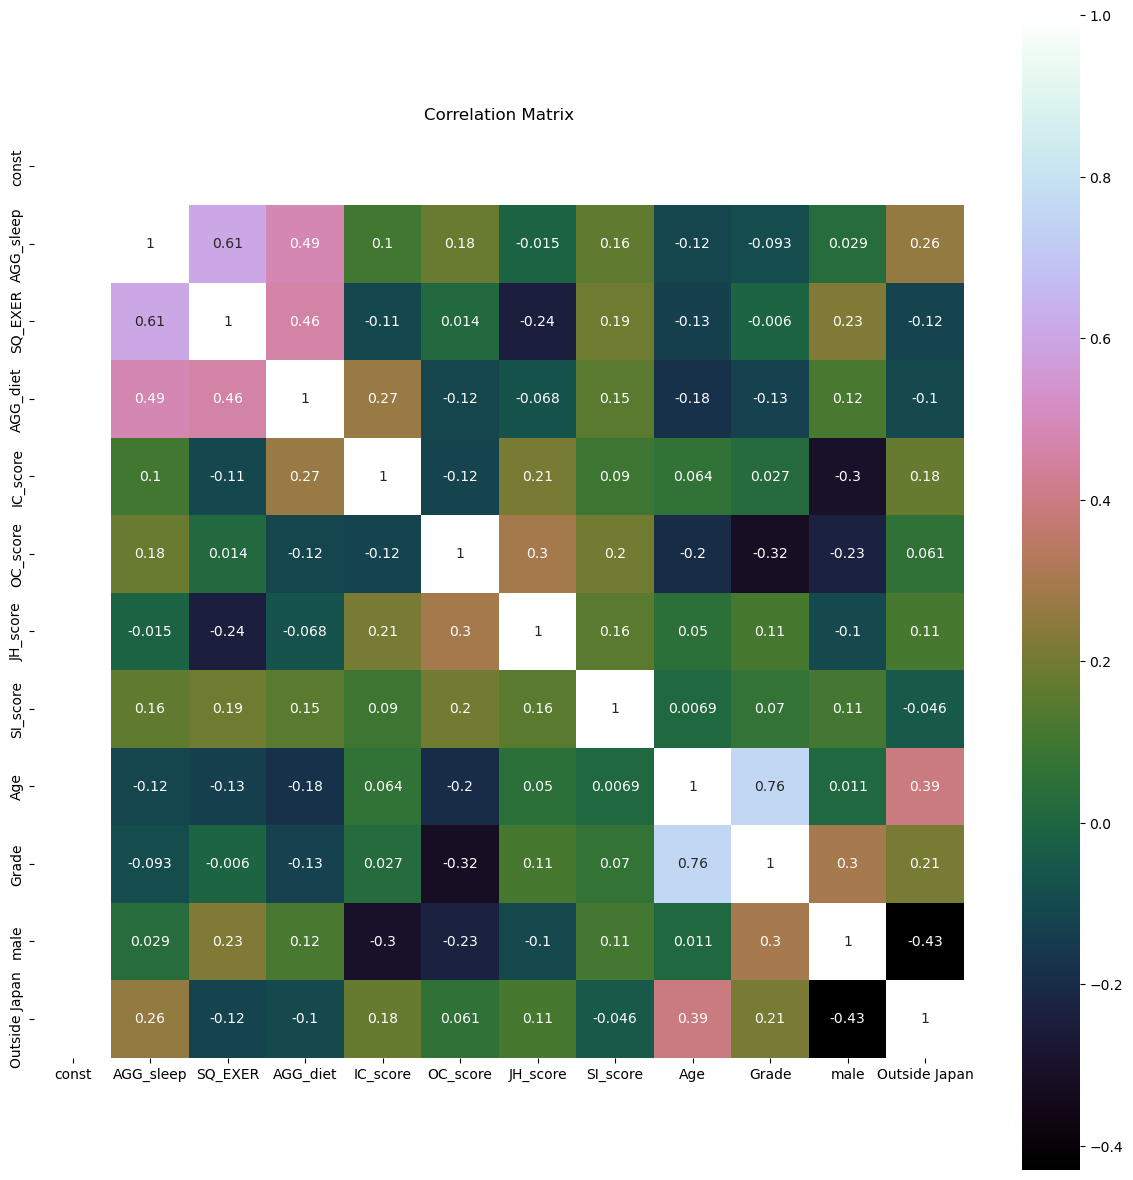

In [235]:
correlation = ind.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [236]:
# it seems like lifestyle measures are correlated. so to avoid multico, aggregate those measure in to one lifestyle measure
df_quant["AGG_sleep"] = AGG_sleep
df_quant["AGG_diet"] = AGG_diet
df_quant['AGG_score'] = AGG_score
df_quant["CORE_score"] = CORE_score
df_quant["IC_score"] = IC_score
df_quant["OC_score"] = OC_score
df_quant["JH_score"] = JH_score
df_quant["SI_score"] = SI_score
AGG_lifestyle = df_quant["AGG_sleep"] + df_quant["SQ_EXER"] + df_quant["AGG_diet"]
df_quant["AGG_lifestyle"] = AGG_lifestyle

# full model with student info with aggregate lifestyle measure

ind = df_quant[["AGG_lifestyle", "IC_score", "OC_score", "JH_score", "SI_score", "Age", "Grade", "male", "Outside Japan"]]
dep = df_quant['CORE_score']

# Add a constant column to the independent variables
ind = sm.add_constant(ind)

# Fit the multiple linear regression model
model = sm.OLS(dep, ind)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             CORE_score   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     8.536
Date:                Wed, 17 May 2023   Prob (F-statistic):           4.04e-07
Time:                        00:28:38   Log-Likelihood:                -30.665
No. Observations:                  52   AIC:                             81.33
Df Residuals:                      42   BIC:                             100.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4945      2.050      0.241

In [237]:
# predicting the difference between core question (first question) and revisited core question (last question)
# with aggregate lifestyle measure

ind = df_quant[["AGG_lifestyle", "IC_score", "OC_score", "JH_score", "SI_score", "Age", "Grade", "male", "Outside Japan"]]
dep = abs(df_quant['SQ_QOL']-df_quant['SQ_QOL_Re'])

# Add a constant column to the independent variables
ind = sm.add_constant(ind)

# Fit the multiple linear regression model
model = sm.OLS(dep, ind)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     1.554
Date:                Wed, 17 May 2023   Prob (F-statistic):              0.161
Time:                        00:28:40   Log-Likelihood:                -56.005
No. Observations:                  52   AIC:                             132.0
Df Residuals:                      42   BIC:                             151.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3889      3.338      1.315

In [238]:
# full model with student info with aggregate lifestyle measure, without age

ind = df_quant[["AGG_lifestyle", "IC_score", "OC_score", "JH_score", "SI_score", "Grade", "male", "Outside Japan"]]
dep = df_quant['CORE_score']

# Add a constant column to the independent variables
ind = sm.add_constant(ind)

# Fit the multiple linear regression model
model = sm.OLS(dep, ind)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             CORE_score   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     9.831
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.22e-07
Time:                        00:28:41   Log-Likelihood:                -30.665
No. Observations:                  52   AIC:                             79.33
Df Residuals:                      43   BIC:                             96.89
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5227      0.657      0.795

In [239]:
# predicting the difference between core question (first question) and revisited core question (last question)
# with aggregate lifestyle measure, without age

ind = df_quant[["AGG_lifestyle", "IC_score", "OC_score", "JH_score", "SI_score", "Grade", "male", "Outside Japan"]]
dep = abs(df_quant['SQ_QOL']-df_quant['SQ_QOL_Re'])

# Add a constant column to the independent variables
ind = sm.add_constant(ind)

# Fit the multiple linear regression model
model = sm.OLS(dep, ind)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1.524
Date:                Wed, 17 May 2023   Prob (F-statistic):              0.177
Time:                        00:28:42   Log-Likelihood:                -56.987
No. Observations:                  52   AIC:                             132.0
Df Residuals:                      43   BIC:                             149.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3735      1.091      0.342

# Correlation coefficients between one construct anf aggregate excpet them for criterion validity
# AVE snd Composite reliability for construct validity
# HTMT ratio for discriminant validity

In [240]:
fl = np.array([[0.58973056, 0.        , 0.        , 0.        ],
       [0.77629559, 0.        , 0.        , 0.        ],
       [0.3601885 , 0.        , 0.        , 0.        ],
       [0.72266162, 0.        , 0.        , 0.        ],
       [0.18931574, 0.        , 0.        , 0.        ],
       [0.        , 0.87827208, 0.        , 0.        ],
       [0.        , 0.83350556, 0.        , 0.        ],
       [0.        , 0.90495298, 0.        , 0.        ],
       [0.        , 0.84025114, 0.        , 0.        ],
       [0.        , 0.5423203 , 0.        , 0.        ],
       [0.        , 0.        , 0.6715871 , 0.        ],
       [0.        , 0.        , 0.73508927, 0.        ],
       [0.        , 0.        , 0.79769495, 0.        ],
       [0.        , 0.        , 0.50547387, 0.        ],
       [0.        , 0.        , 0.07771851, 0.        ],
       [0.        , 0.        , 0.        , 0.81263035],
       [0.        , 0.        , 0.        , 0.73069481],
       [0.        , 0.        , 0.        , 0.8503244 ],
       [0.        , 0.        , 0.        , 0.73439776]])
fl_sq = fl**2
fl_err_var = 1- fl_sq

In [241]:
fl_sq

array([[0.34778213, 0.        , 0.        , 0.        ],
       [0.60263484, 0.        , 0.        , 0.        ],
       [0.12973576, 0.        , 0.        , 0.        ],
       [0.52223982, 0.        , 0.        , 0.        ],
       [0.03584045, 0.        , 0.        , 0.        ],
       [0.        , 0.77136185, 0.        , 0.        ],
       [0.        , 0.69473152, 0.        , 0.        ],
       [0.        , 0.8189399 , 0.        , 0.        ],
       [0.        , 0.70602198, 0.        , 0.        ],
       [0.        , 0.29411131, 0.        , 0.        ],
       [0.        , 0.        , 0.45102923, 0.        ],
       [0.        , 0.        , 0.54035623, 0.        ],
       [0.        , 0.        , 0.63631723, 0.        ],
       [0.        , 0.        , 0.25550383, 0.        ],
       [0.        , 0.        , 0.00604017, 0.        ],
       [0.        , 0.        , 0.        , 0.66036809],
       [0.        , 0.        , 0.        , 0.53391491],
       [0.        , 0.        ,

In [242]:
fl_err_var 

array([[0.65221787, 1.        , 1.        , 1.        ],
       [0.39736516, 1.        , 1.        , 1.        ],
       [0.87026424, 1.        , 1.        , 1.        ],
       [0.47776018, 1.        , 1.        , 1.        ],
       [0.96415955, 1.        , 1.        , 1.        ],
       [1.        , 0.22863815, 1.        , 1.        ],
       [1.        , 0.30526848, 1.        , 1.        ],
       [1.        , 0.1810601 , 1.        , 1.        ],
       [1.        , 0.29397802, 1.        , 1.        ],
       [1.        , 0.70588869, 1.        , 1.        ],
       [1.        , 1.        , 0.54897077, 1.        ],
       [1.        , 1.        , 0.45964377, 1.        ],
       [1.        , 1.        , 0.36368277, 1.        ],
       [1.        , 1.        , 0.74449617, 1.        ],
       [1.        , 1.        , 0.99395983, 1.        ],
       [1.        , 1.        , 1.        , 0.33963191],
       [1.        , 1.        , 1.        , 0.46608509],
       [1.        , 1.        ,

In [243]:
# AVE = (summation of squared factor loadings)/(summation of squared factor loadings) (summation of error variances) 

sum_fl_sq = fl_sq[0][0] + fl_sq[1][0] + fl_sq[2][0] + fl_sq[3][0] + fl_sq[4][0]
sum_fl_err_var = fl_err_var[0][0] + fl_err_var[1][0] + fl_err_var[2][0] + fl_err_var[3][0] + fl_err_var[4][0]

IC_AVE = sum_fl_sq/(sum_fl_sq*sum_fl_err_var)

IC_AVE

0.29746261401487173

In [244]:
def AVE(item, start):
    sum_fl_sq = fl_sq[start][item] + fl_sq[start+1][item] + fl_sq[start+2][item] + fl_sq[start+3][item] + fl_sq[start+4][item]
    sum_fl_err_var = fl_err_var[start][item] + fl_err_var[start+1][item] + fl_err_var[start+2][item] + fl_err_var[start+3][item] + fl_err_var[start+4][item]
    AVE = sum_fl_sq/(sum_fl_sq*sum_fl_err_var)
    return AVE

# for IC
IC_AVE = AVE(0, 0)
IC_AVE


0.29746261401487173

In [245]:
# for OC
OC_AVE = AVE(1,5)
OC_AVE

0.5831470095990654

In [246]:
# for JH
JH_AVE = AVE(2, 10)
JH_AVE

0.3214655435199235

In [247]:
# for SI
def AVE_4(item, start):
    sum_fl_sq = fl_sq[start][item] + fl_sq[start+1][item] + fl_sq[start+2][item] + fl_sq[start+3][item]
    sum_fl_err_var = fl_err_var[start][item] + fl_err_var[start+1][item] + fl_err_var[start+2][item] + fl_err_var[start+3][item]
    AVE = sum_fl_sq/(sum_fl_sq*sum_fl_err_var)
    return AVE

SI_AVE = AVE_4(3, 15)
SI_AVE

0.647951514278895

In [248]:
def CR_5(item, start):
    sum_fl= fl[start][item] + fl[start+1][item] + fl[start+2][item] + fl[start+3][item] + fl[start+4][item]
    sum_fl_sq = sum_fl**2
    sum_fl_err_var = fl_err_var[start][item] + fl_err_var[start+1][item] + fl_err_var[start+2][item] + fl_err_var[start+3][item] + fl_err_var[start+4][item]
    CR = sum_fl_sq / (sum_fl_sq + sum_fl_err_var)
    return CR

IC_CR = CR_5(0,0)


In [249]:
OC_CR = CR_5(1,5)


In [250]:
JH_CR = CR_5(2, 10)


In [251]:
def CR_4(item, start):
    sum_fl= fl[start][item] + fl[start+1][item] + fl[start+2][item] + fl[start+3][item]
    sum_fl_sq = sum_fl**2
    sum_fl_err_var = fl_err_var[start][item] + fl_err_var[start+1][item] + fl_err_var[start+2][item] + fl_err_var[start+3][item]
    CR = sum_fl_sq / (sum_fl_sq + sum_fl_err_var)
    return CR

SI_CR = CR_4(3,15)

In [252]:
AVE_ = [IC_AVE, OC_AVE, JH_AVE, SI_AVE]
CR_ = [IC_CR, OC_CR, JH_CR, SI_CR]
AVE_

[0.29746261401487173,
 0.5831470095990654,
 0.3214655435199235,
 0.647951514278895]

In [253]:
CR_

[0.6743049508999518, 0.9031673610006755, 0.7141184053251608, 0.863760185430202]

In [256]:
pd.DataFrame(AVE_, columns = ["AVE"], index = ["IC", "OC", "JH", "SI"])



,AVE
IC,0.297463
OC,0.583147
JH,0.321466
SI,0.647952


In [255]:
pd.DataFrame(CR_, columns = ["CR"], index = ["IC", "OC", "JH", "SI"])

,CR
IC,0.674305
OC,0.903167
JH,0.714118
SI,0.863760


In [259]:
core = df_quant["CORE_score"]

In [260]:
AGG_dim = df_quant["IC_score"] + df_quant["OC_score"] + df_quant["JH_score"] + df_quant["SI_score"]
AGG_dim


0     13.15
1     16.35
2     13.60
3     12.75
4     14.45
5     16.85
6     13.60
7     17.00
8     18.75
9     15.55
10    15.65
11    10.80
12    17.00
13    15.80
14    14.65
15    14.30
16    14.00
17    18.25
18    15.80
19    14.90
20    16.20
21    16.70
22    10.40
23    17.25
24    15.15
25    15.40
26    14.10
27    15.75
28    15.85
29    14.10
30    13.30
31    13.45
32    16.00
33    17.65
34    13.75
35    15.90
36    14.50
37    14.60
38    13.55
39    14.95
40    16.15
41    12.30
42    12.90
43    14.90
44    18.35
45    16.20
46    15.00
47    17.50
48    13.75
49    15.80
50    14.65
51    12.95
dtype: float64

In [266]:
cv = pd.DataFrame([core, AGG_dim]).transpose()

In [267]:
cv.corr()

,CORE_score,Unnamed 0
CORE_score,1.000000,0.525027
Unnamed 0,0.525027,1.000000


In [268]:


ind = df_quant[["IC_score", "OC_score", "JH_score", "SI_score"]]
dep = df_quant['CORE_score']

# Add a constant column to the independent variables
ind = sm.add_constant(ind)

# Fit the multiple linear regression model
model = sm.OLS(dep, ind)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             CORE_score   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     10.95
Date:                Wed, 17 May 2023   Prob (F-statistic):           2.35e-06
Time:                        00:52:56   Log-Likelihood:                -40.584
No. Observations:                  52   AIC:                             91.17
Df Residuals:                      47   BIC:                             100.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0875      0.672     -0.130      0.8

# Additional analysis
maybe eliminating some questions found inconsistent or unreliable may change some results

In [269]:
df_quant.head(5)

,Grade,Gender,Age,Nationality,Department,SQ_QOL,SQ_IC_Perform,SQ_IC_Effort,SQ_IC_Accomp,SQ_IC_Pride,SQ_IC_Recom,SQ_OC_Perform,SQ_OC_Accomp,SQ_OC_Pride,SQ_OC_Active,SQ_OC_VarOp,SQ_JH_Prog,SQ_JH_Plan,SQ_JH_Dedi,SQ_JH_Exp,SQ_JH_Netw,SQ_SI_Way,SQ_SI_Belong,SQ_SI_Future,SQ_SI_Recom,SQ_SL_Morn,SQ_SL_Mid,SQ_SL_When,SQ_SL_Hour,SQ_EXER,SQ_D_Healthy,SQ_D_Unhealthy,SQ_D_Conf,SQ_QOL_Re,CORE_score,IC_score,OC_score,JH_score,SI_score,AGG_score,male,Outside Japan,AGG_sleep,AGG_diet,AGG_lifestyle
0,2,male,20,Japan,Economics PEARL,4,4,4,4,4,4,3,3,3,3,3,2,2,2,3,3,3,3,3,3,4,4,0:00~1:00,7~9 hours,5,Very often (daily),Sometimes (2-3 times a week),4,4,4.0,4.0,3.0,2.4,3.75,17.15,1,0,0.931759,0.742771,6.674530
1,2,female,19,Outside Japan,Economics PEARL,4,3,4,4,3,3,4,5,5,5,4,3,3,3,4,5,3,4,4,4,4,5,0:00~1:00,4~7 hours,4,Often (4-5 times a week),Sometimes (2-3 times a week),4,4,4.0,3.4,4.6,3.6,4.75,20.35,0,1,0.662899,0.366315,5.029213
2,2,male,20,Japan,Economics PEARL,4,1,1,3,1,3,5,5,5,5,3,2,2,3,2,2,5,5,5,3,4,4,23:00~0:00,7~9 hours,5,Rarely (once a week or less),Sometimes (2-3 times a week),3,4,4.0,1.8,4.6,2.2,5.00,17.60,1,0,1.203776,-0.775350,5.428425
3,2,female,20,Japan,Economics PEARL,4,4,2,2,3,2,4,4,4,4,2,2,5,3,3,1,4,2,4,2,4,2,0:00~1:00,7~9 hours,2,Very often (daily),Often (4-5 times a week),4,2,3.0,2.6,3.6,2.8,3.75,15.75,0,0,0.466508,0.314101,2.780609
4,4,female,22,Japan,Economics PEARL,4,4,2,3,2,1,4,5,4,4,2,5,4,3,3,5,4,2,5,3,1,1,0:00~1:00,4~7 hours,3,Often (4-5 times a week),Very often (daily),2,2,3.0,2.4,3.8,4.0,4.25,17.45,0,0,-1.026640,-1.268532,0.704828


In [271]:
df_quant.columns

Index(['Grade', 'Gender', 'Age', 'Nationality', 'Department', 'SQ_QOL',
       'SQ_IC_Perform', 'SQ_IC_Effort', 'SQ_IC_Accomp', 'SQ_IC_Pride',
       'SQ_IC_Recom', 'SQ_OC_Perform', 'SQ_OC_Accomp', 'SQ_OC_Pride',
       'SQ_OC_Active', 'SQ_OC_VarOp', 'SQ_JH_Prog', 'SQ_JH_Plan', 'SQ_JH_Dedi',
       'SQ_JH_Exp', 'SQ_JH_Netw', 'SQ_SI_Way', 'SQ_SI_Belong', 'SQ_SI_Future',
       'SQ_SI_Recom', 'SQ_SL_Morn', 'SQ_SL_Mid', 'SQ_SL_When', 'SQ_SL_Hour',
       'SQ_EXER', 'SQ_D_Healthy', 'SQ_D_Unhealthy', 'SQ_D_Conf', 'SQ_QOL_Re',
       'CORE_score', 'IC_score', 'OC_score', 'JH_score', 'SI_score',
       'AGG_score', 'male', 'Outside Japan', 'AGG_sleep', 'AGG_diet',
       'AGG_lifestyle'],
      dtype='object')

In [280]:
for_cor = df_quant[['CORE_score', 'SQ_IC_Perform', 'SQ_IC_Effort', 'SQ_IC_Accomp', 'SQ_IC_Pride',
       'SQ_IC_Recom', 'SQ_OC_Perform', 'SQ_OC_Accomp', 'SQ_OC_Pride',
       'SQ_OC_Active', 'SQ_OC_VarOp', 'SQ_JH_Prog', 'SQ_JH_Plan', 'SQ_JH_Dedi',
       'SQ_JH_Exp', 'SQ_JH_Netw', 'SQ_SI_Way', 'SQ_SI_Belong', 'SQ_SI_Future',
       'SQ_SI_Recom']]
cor = for_cor.corr()

styler = cor.style

# Apply bold formatting to values greater than 0.5
styler.applymap(lambda x: 'font-weight: bold' if x < 0.2 and x in cor.iloc[:, 0].values else '')

# Display the dataframe with bolded values
styler

,CORE_score,SQ_IC_Perform,SQ_IC_Effort,SQ_IC_Accomp,SQ_IC_Pride,SQ_IC_Recom,SQ_OC_Perform,SQ_OC_Accomp,SQ_OC_Pride,SQ_OC_Active,SQ_OC_VarOp,SQ_JH_Prog,SQ_JH_Plan,SQ_JH_Dedi,SQ_JH_Exp,SQ_JH_Netw,SQ_SI_Way,SQ_SI_Belong,SQ_SI_Future,SQ_SI_Recom
CORE_score,1.000000,-0.046584,0.306057,0.395967,0.079527,0.398339,0.340613,0.086070,0.277200,0.155726,-0.034700,0.147244,-0.081320,0.039287,0.039881,0.059513,0.489354,0.670908,0.440943,0.433584
SQ_IC_Perform,-0.046584,1.000000,0.448289,0.127026,0.421468,0.060814,-0.233453,-0.295857,-0.294640,-0.167192,-0.195560,0.135537,0.244236,0.140529,0.179304,-0.114351,-0.239712,-0.128903,-0.106499,-0.100560
SQ_IC_Effort,0.306057,0.448289,1.000000,0.360197,0.543157,0.198952,-0.000888,-0.308214,-0.110427,-0.174011,-0.105650,0.304543,0.165502,0.177970,0.282508,-0.026982,-0.253213,0.126800,0.000960,0.066883
SQ_IC_Accomp,0.395967,0.127026,0.360197,1.000000,0.265776,0.442229,0.184001,0.093566,0.152831,0.075093,-0.141157,0.136268,0.008765,-0.136205,0.060898,0.027017,-0.028977,0.097847,0.140256,0.147306
SQ_IC_Pride,0.079527,0.421468,0.543157,0.265776,1.000000,0.130121,0.084441,-0.176146,-0.047178,-0.074606,-0.097767,0.288294,0.244470,0.352661,0.199272,-0.164691,-0.258860,-0.230360,-0.154337,-0.078282
SQ_IC_Recom,0.398339,0.060814,0.198952,0.442229,0.130121,1.000000,0.122063,-0.100223,0.100559,-0.046812,0.084559,-0.076112,-0.199623,-0.248373,0.150002,0.207413,0.187422,0.240429,0.327190,0.660368
SQ_OC_Perform,0.340613,-0.233453,-0.000888,0.184001,0.084441,0.122063,1.000000,0.709224,0.812546,0.734521,0.463321,0.334570,0.136866,0.236872,0.220686,0.083755,0.131434,0.108159,0.327663,0.204681
SQ_OC_Accomp,0.086070,-0.295857,-0.308214,0.093566,-0.176146,-0.100223,0.709224,1.000000,0.769491,0.708825,0.369080,0.230599,0.182091,0.213172,0.170071,0.227186,0.130218,-0.012381,0.114888,0.090788
SQ_OC_Pride,0.277200,-0.294640,-0.110427,0.152831,-0.047178,0.100559,0.812546,0.769491,1.000000,0.735138,0.453475,0.215260,0.128532,0.222562,0.282722,0.268483,0.031604,0.064786,0.187281,0.183699
SQ_OC_Active,0.155726,-0.167192,-0.174011,0.075093,-0.074606,-0.046812,0.734521,0.708825,0.735138,1.000000,0.628088,0.178469,0.047119,0.224210,0.175974,0.088021,0.061792,-0.021533,0.176706,0.137781


In [ ]:
### Qs to eliminate
# From PCA and EFA ... SQ_IC_Perform, SQ_IC_Recom, SQ_OC_VarOp
# From CFA FL ... SQ_IC_Perform, SQ_IC_Accomp, SQ_IC_Recom,SQ_OC_VarOp, SQ_JH_Exp
# From Cronbach's Alpha maximization 
## Overall ... SQ_IC_Perform, SQ_IC_Pride 
## IC ... SQ_IC_Recom
## OC ... SQ_OC_VarOp
## JH ... SQ_JH_Netw
# From Correlation Coefficients 
## IC ... SQ_IC_Perform, SQ_IC_Pride
## OC ... SQ_OC_Accomp, SQ_OC_Active, SQ_OC_VarOp
## JH ... All

### From the information above, we eliminate Qs that appear frequently
# 3-> SQ_IC_Perform, SQ_IC_Recom, SQ_OC_VarOp
# 2-> SQ_IC_Pride, SQ_JH_EXP, SQ_JH_Netw
### eliminate these 6 and create new aggregate measure

In [282]:
# before elimination

ind = df_quant['AGG_lifestyle']
dep = df_quant['AGG_score']

# Add a constant column to the independent variables
ind = sm.add_constant(ind)

# Fit the multiple linear regression model
model = sm.OLS(dep, ind)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              AGG_score   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.292
Date:                Wed, 17 May 2023   Prob (F-statistic):              0.136
Time:                        15:32:10   Log-Likelihood:                -114.55
No. Observations:                  52   AIC:                             233.1
Df Residuals:                      50   BIC:                             237.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.9482      0.536     33.515

In [284]:
# after elimination # another difference that questions are weighted equally not dimensiona this time
AFTER = ['SQ_QOL', 'SQ_IC_Effort', 'SQ_IC_Accomp', 
 'SQ_OC_Perform', 'SQ_OC_Accomp', 'SQ_OC_Pride','SQ_OC_Active', 
 'SQ_JH_Prog', 'SQ_JH_Plan', 'SQ_JH_Dedi', 
 'SQ_SI_Way', 'SQ_SI_Belong', 'SQ_SI_Future','SQ_SI_Recom']
NEW_AGG = df_quant['SQ_QOL_Re']
for Q in AFTER:
    NEW_AGG += df[Q]

df_quant["NEW_AGG"] = NEW_AGG


In [285]:

ind = df_quant['AGG_lifestyle']
dep = df_quant['NEW_AGG']

# Add a constant column to the independent variables
ind = sm.add_constant(ind)

# Fit the multiple linear regression model
model = sm.OLS(dep, ind)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                NEW_AGG   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.256
Date:                Wed, 17 May 2023   Prob (F-statistic):              0.268
Time:                        15:50:27   Log-Likelihood:                -210.31
No. Observations:                  52   AIC:                             424.6
Df Residuals:                      50   BIC:                             428.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            99.0848      3.377     29.340

In [291]:
NEW_IC = df_quant[['SQ_IC_Effort', 'SQ_IC_Accomp']].sum(axis=1)/2
NEW_OC = df_quant[['SQ_OC_Perform', 'SQ_OC_Accomp', 'SQ_OC_Pride','SQ_OC_Active']].sum(axis=1)/4
NEW_JH = df_quant[['SQ_JH_Prog', 'SQ_JH_Plan', 'SQ_JH_Dedi']].sum(axis=1)/3

df_quant["NEW_IC"] = NEW_IC
df_quant["NEW_OC"] = NEW_OC
df_quant["NEW_JH"] = NEW_JH


In [292]:
ind = df_quant[["AGG_lifestyle", "NEW_IC", "NEW_OC", "NEW_JH", "SI_score", "Grade", "male", "Outside Japan"]]
dep = df_quant['CORE_score']

# Add a constant column to the independent variables
ind = sm.add_constant(ind)

# Fit the multiple linear regression model
model = sm.OLS(dep, ind)
results = model.fit()

# Print the summary of the regression results
print(results.summary())


### IC became significant indicator but OC and JH are not

                            OLS Regression Results                            
Dep. Variable:             CORE_score   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     10.94
Date:                Wed, 17 May 2023   Prob (F-statistic):           2.97e-08
Time:                        16:05:24   Log-Likelihood:                -28.829
No. Observations:                  52   AIC:                             75.66
Df Residuals:                      43   BIC:                             93.22
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3851      0.574      0.672

In [293]:
ind = df_quant[["AGG_lifestyle", "NEW_IC", "SI_score","male"]]
dep = df_quant['CORE_score']

# Add a constant column to the independent variables
ind = sm.add_constant(ind)

# Fit the multiple linear regression model
model = sm.OLS(dep, ind)
results = model.fit()

# Print the summary of the regression results
print(results.summary())


# after eliminating insignificant p-value variables, adj R square imporved

                            OLS Regression Results                            
Dep. Variable:             CORE_score   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     23.32
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.15e-10
Time:                        16:07:12   Log-Likelihood:                -29.271
No. Observations:                  52   AIC:                             68.54
Df Residuals:                      47   BIC:                             78.30
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4961      0.431      1.151

In [296]:
NEW_ELIM_AGG = NEW_IC + df_quant["SI_score"]
df_quant["NEW_ELIM_AGG"] = NEW_ELIM_AGG

In [297]:
ind = df_quant["AGG_lifestyle"]
dep = df_quant['NEW_ELIM_AGG']

# Add a constant column to the independent variables
ind = sm.add_constant(ind)

# Fit the multiple linear regression model
model = sm.OLS(dep, ind)
results = model.fit()

# Print the summary of the regression results
print(results.summary())


# after eliminating Qs and insignificant dimension, F stat and p-value improved, but still above 0.05

                            OLS Regression Results                            
Dep. Variable:           NEW_ELIM_AGG   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.389
Date:                Wed, 17 May 2023   Prob (F-statistic):             0.0716
Time:                        16:14:54   Log-Likelihood:                -81.813
No. Observations:                  52   AIC:                             167.6
Df Residuals:                      50   BIC:                             171.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4849      0.285     26.230

In [298]:
#Bartlett’s test of sphericity
"""Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 
using the observed correlation matrix against the identity matrix. 
If the test found statistically insignificant, you should not employ a factor analysis."""

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(factors)
chi_square_value, p_value

# low p-value indicates that correlation matrix is not identity matrix. 
# so there should be statistically significant correlation coefficients, which is considered good.

(648.3245763745196, 3.1024943664359508e-46)

In [300]:
#KMO measure
"""Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
It determines the adequacy for each observed variable and for the complete model.
KMO estimates the proportion of variance among all the observed variable. 
Lower proportion is more suitable for factor analysis. KMO values range between 0 and 1. 
Value of KMO less than 0.6 is considered inadequate."""

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(factors)
kmo_model

# higher than 0.6 so not that problematic, but not perfect sampling
# 0.8 ~ 1.0 is ideal

0.6491262012604835